# Analysis on Crop Production in India

### Problem Statement

The Agriculture business domain, as a vital part of the overall supply chain, is
expected to highly evolve in the upcoming years via the developments, which are
taking place on the side of the Future Internet. This paper presents a novel
Business-to-Business collaboration platform from the agri-food sector perspective,
which aims to facilitate the collaboration of numerous stakeholders belonging to
associated business domains, in an effective and flexible manner.


This dataset provides a huge amount of information on crop production in India
ranging from several years. Based on the Information the ultimate goal would be to
predict crop production and find important insights highlighting key indicators and
metrics that influence crop production.

### Data Loading And Preprocessing

In [1]:
# import the libraries
import numpy as np
import pandas as pd

In [2]:
# load the datasets
df = pd.read_csv("Crop Production data.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
# print the number of rows and columns of crops data
df.shape

(246091, 7)

In [4]:
# print non null count and data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
# datatypes of columns 
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

### Data Cleaning

In [6]:
# print null count of columns in data
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
# print percentage of null count
df.isnull().sum()/len(df)

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       0.015157
dtype: float64

We have less than 5% of null values in production column so we can drop them

In [8]:
# drop the null values in production column
df.dropna(inplace = True)

In [9]:
# check for null count
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [10]:
# check dimensions of data after dropping null count
df.shape

(242361, 7)

Dropped the null rows from data

In [11]:
# Check and drop for duplicates in the data

df.drop_duplicates(inplace = True)

### Exploratory Data Analysis

#### Univariate Analysis

In [12]:
# import libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

Categorize the crops according to various categories

In [14]:
# creating function crop_cat

def crop_cat(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra',
              'Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop == i:
            return "Cereal"
    
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop == i:
            return "Pulses"
        
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop == i:
            return "Fruits"

    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop == i:
            return "Beans"
        
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish',
              'Snak Guard','Bottle Gourd','Bitter Gourd','Cucumber','Drum Stick','Cauliflower',
              'Beans & Mutter(Vegetable)','Cabbage','Bhindi','Tomato','Brinjal','Khesari','Sweet potato',
              'Potato','Onion','Tapioca','Colocosia']:
        if crop == i:
            return "Vegetables"
        
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric',
              'Dry chillies','Cond-spcs other']:
        if crop == i:
            return "Spices"
        
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop == i:
            return "Fibres"
        
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop == i:
            return "Nuts"
        
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower',
              'Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop == i:
            return "Oilseeds"
        
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop == i:
            return "Commercial"

In [15]:
# Creating new column crop_cat 

df["crop_cat"] = df["Crop"].apply(crop_cat)

In [16]:
# Print first five rows after adding new column

df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


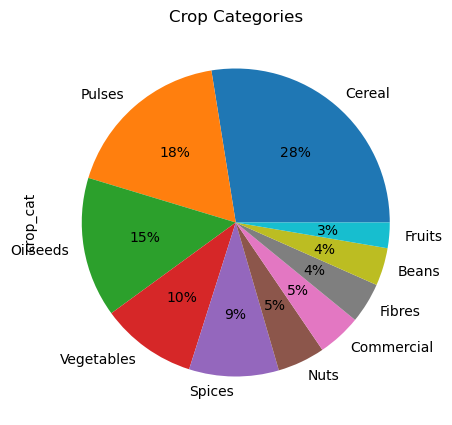

In [17]:
# See distribution of crop production in India accouding to crop categories

plt.figure(figsize = (10,5))
df["crop_cat"].value_counts(normalize = True).plot.pie(autopct = "%1.0f%%")
plt.title("Crop Categories")
plt.show()

Cereal and pulses cultivation is leading in the country Whereas Fruits , Beans and Fibres are less taken.

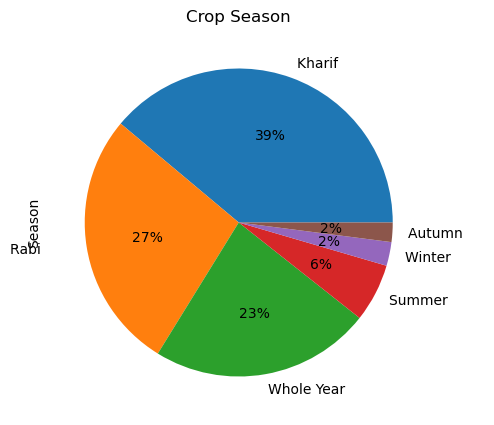

In [18]:
# See distribution of crop production in India accouding to Season

plt.figure(figsize = (10,5))
df["Season"].value_counts(normalize = True).plot.pie(autopct = "%1.0f%%")
plt.title("Crop Season")
plt.show()

Most of the crops cultivated in Kharif Season and in Autumn we can see least Crop production.

In [19]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [20]:
df.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

#### Bivariate Analysis

In [21]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


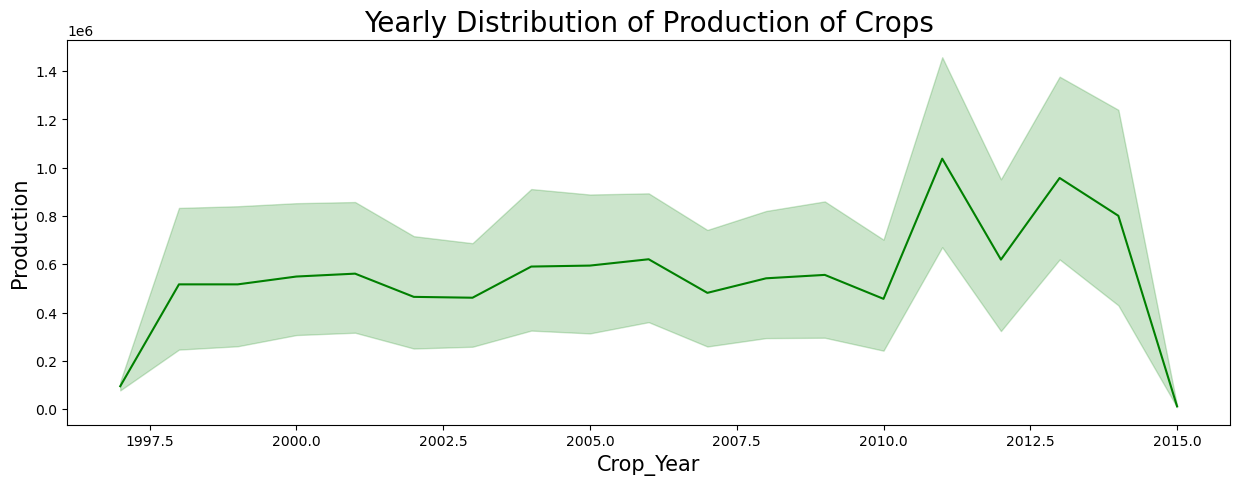

In [22]:
# plot Yearly Distribution of Production of Crops
plt.figure(figsize = (15 , 5))
sns.lineplot(data = df , x ="Crop_Year" , y = "Production",color ="green", markers = True)
plt.xlabel("Crop_Year",size = 15)
plt.ylabel("Production",size = 15)
plt.title("Yearly Distribution of Production of Crops",size = 20)
plt.show()

Between year 2010 and 2012 there was peak production in the year 2011.

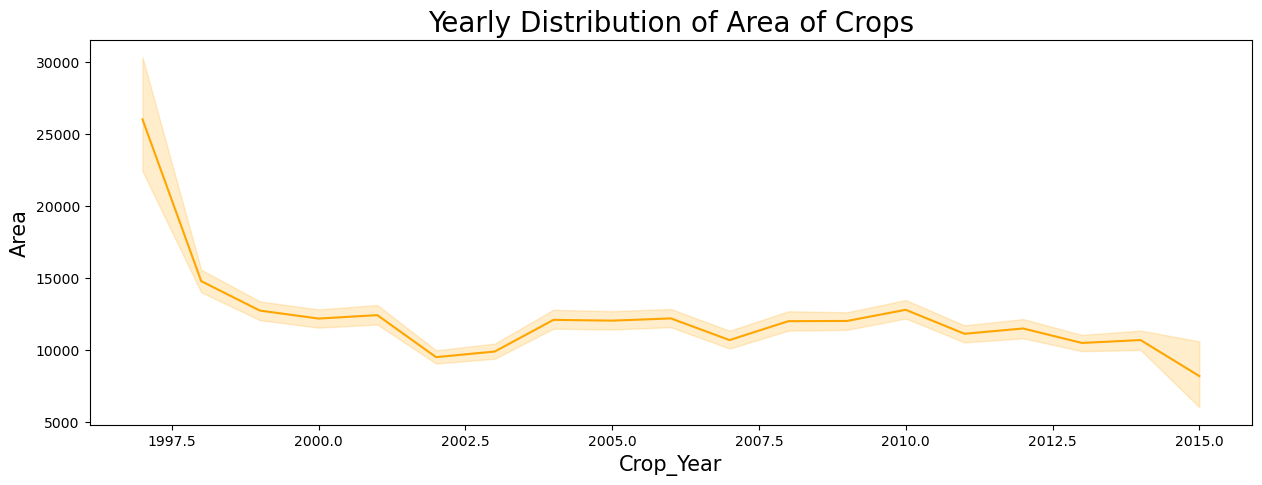

In [23]:
# plot Yearly Distribution of Production of Crops
plt.figure(figsize = (15 , 5))
sns.lineplot(data = df , x ="Crop_Year" , y = "Area",color = "orange" , markers = True)
plt.xlabel("Crop_Year",size = 15)
plt.ylabel("Area",size = 15)
plt.title("Yearly Distribution of Area of Crops",size = 20)
plt.show()

Between Year 1997 and 2000 there is massive decrease in the area of cultivation of crops.

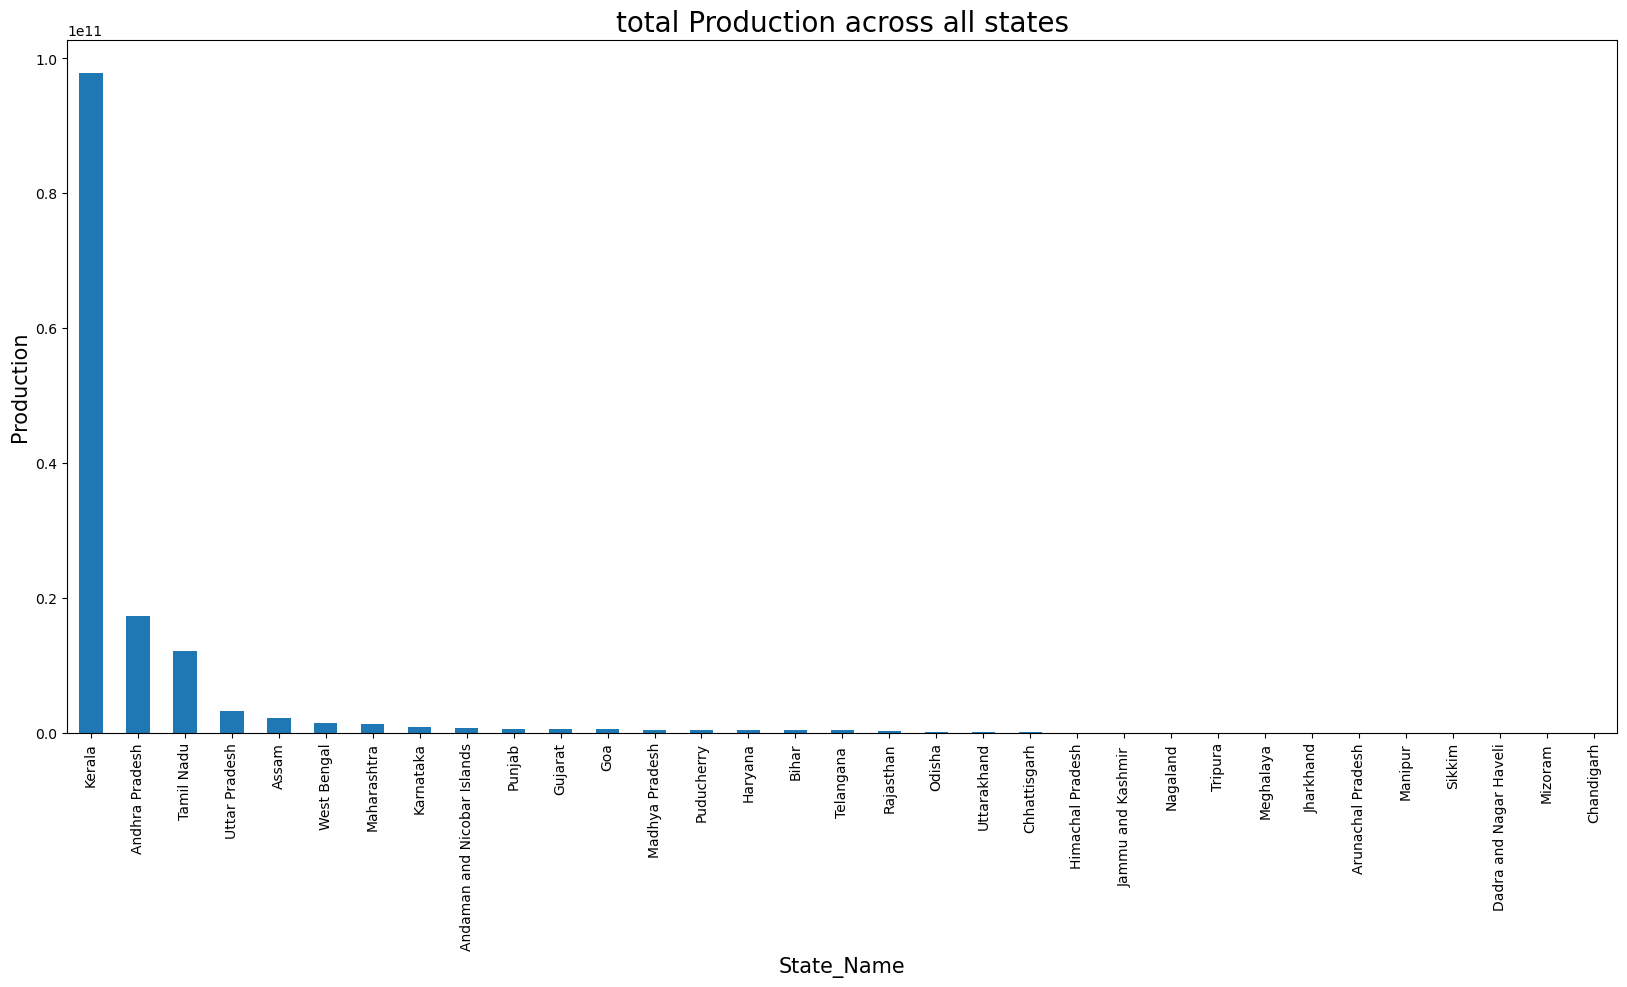

In [24]:
# plot total Production across all states

plt.figure(figsize =(20,9))
df.groupby("State_Name")["Production"].sum().sort_values(ascending = False).plot(kind = "bar")
plt.title('total Production across all states' , size = 20)
plt.xlabel("State_Name",size =15)
plt.ylabel("Production",size = 15)
plt.show()

Kerala is highly producing state in the country while Chandigargh is lowest in production of crops. After observation we can see top 3 states in crop production are from sounth region of India.

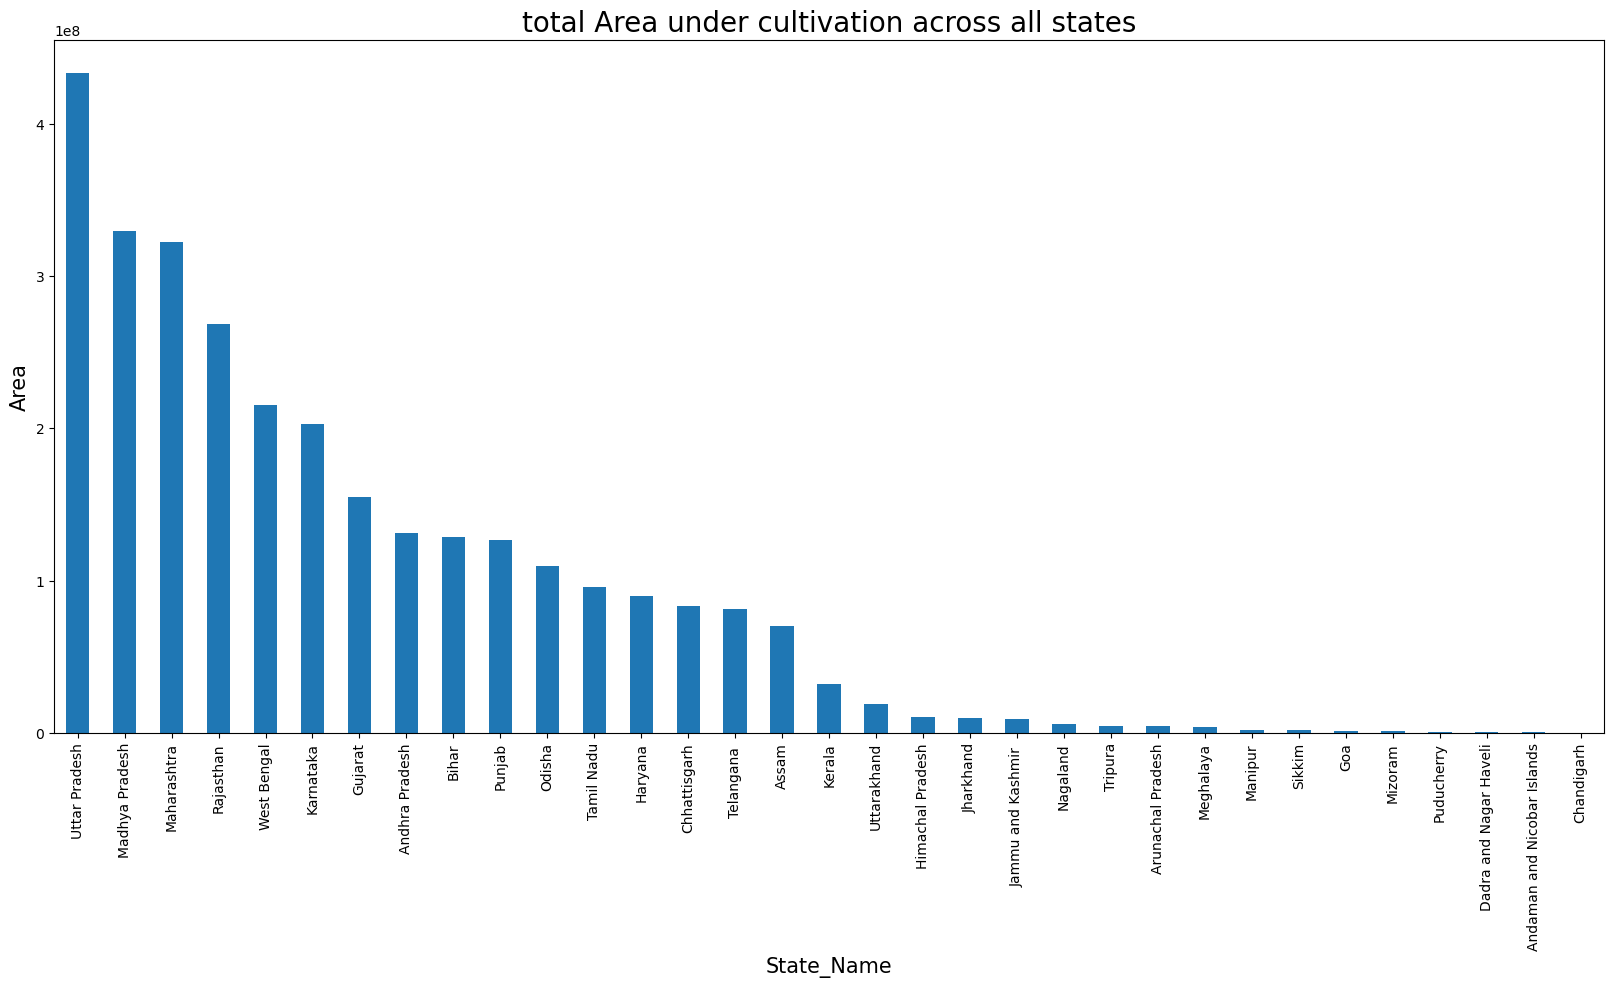

In [25]:
# plot total Area across all states

plt.figure(figsize =(20,9))
df.groupby("State_Name")["Area"].sum().sort_values(ascending = False).plot(kind = "bar")
plt.title('total Area under cultivation across all states' , size = 20)
plt.xlabel("State_Name",size = 15)
plt.ylabel("Area",size = 15)
plt.show()

In the aspect of area under crop cultivation Uttar Pradesh tops the list whereas Chandigargh has lowest area of cultivation.

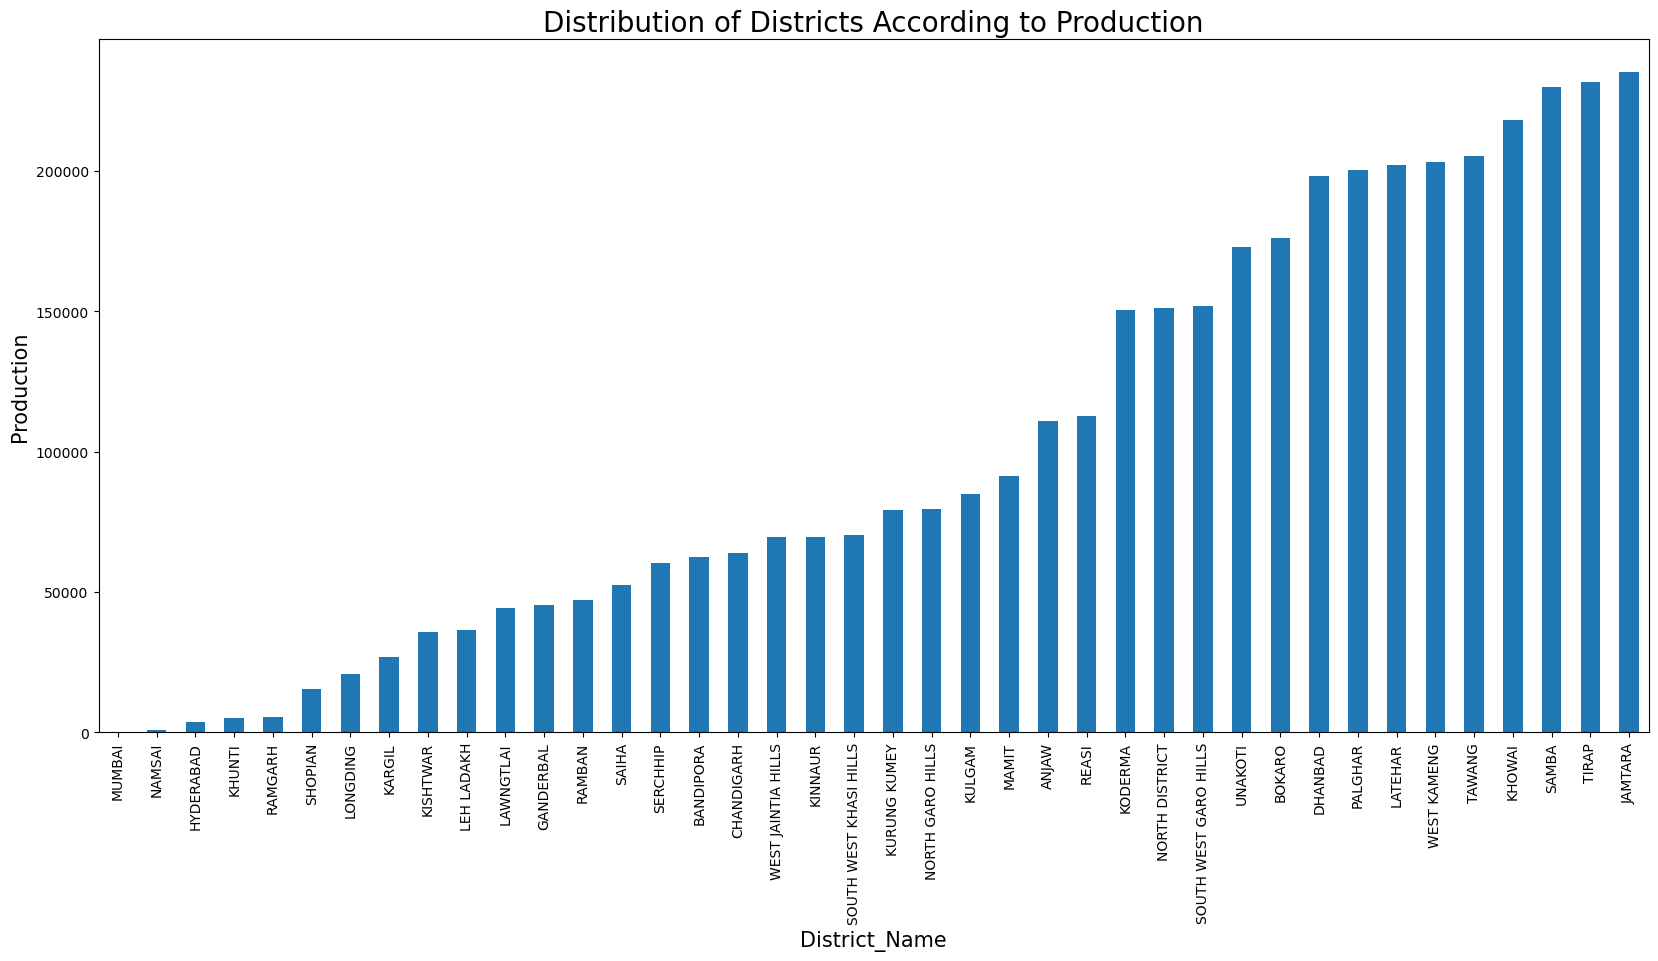

In [26]:
# Plot distribution of districts according to production

plt.figure(figsize=(20,9))
df.groupby("District_Name")["Production"].sum().sort_values().head(40).plot(kind="bar")
plt.title("Distribution of Districts According to Production" , size = 20)
plt.xlabel("District_Name",size = 15)
plt.ylabel("Production",size = 15)
plt.show()

Mumbai district has no crop production or least production among all states.

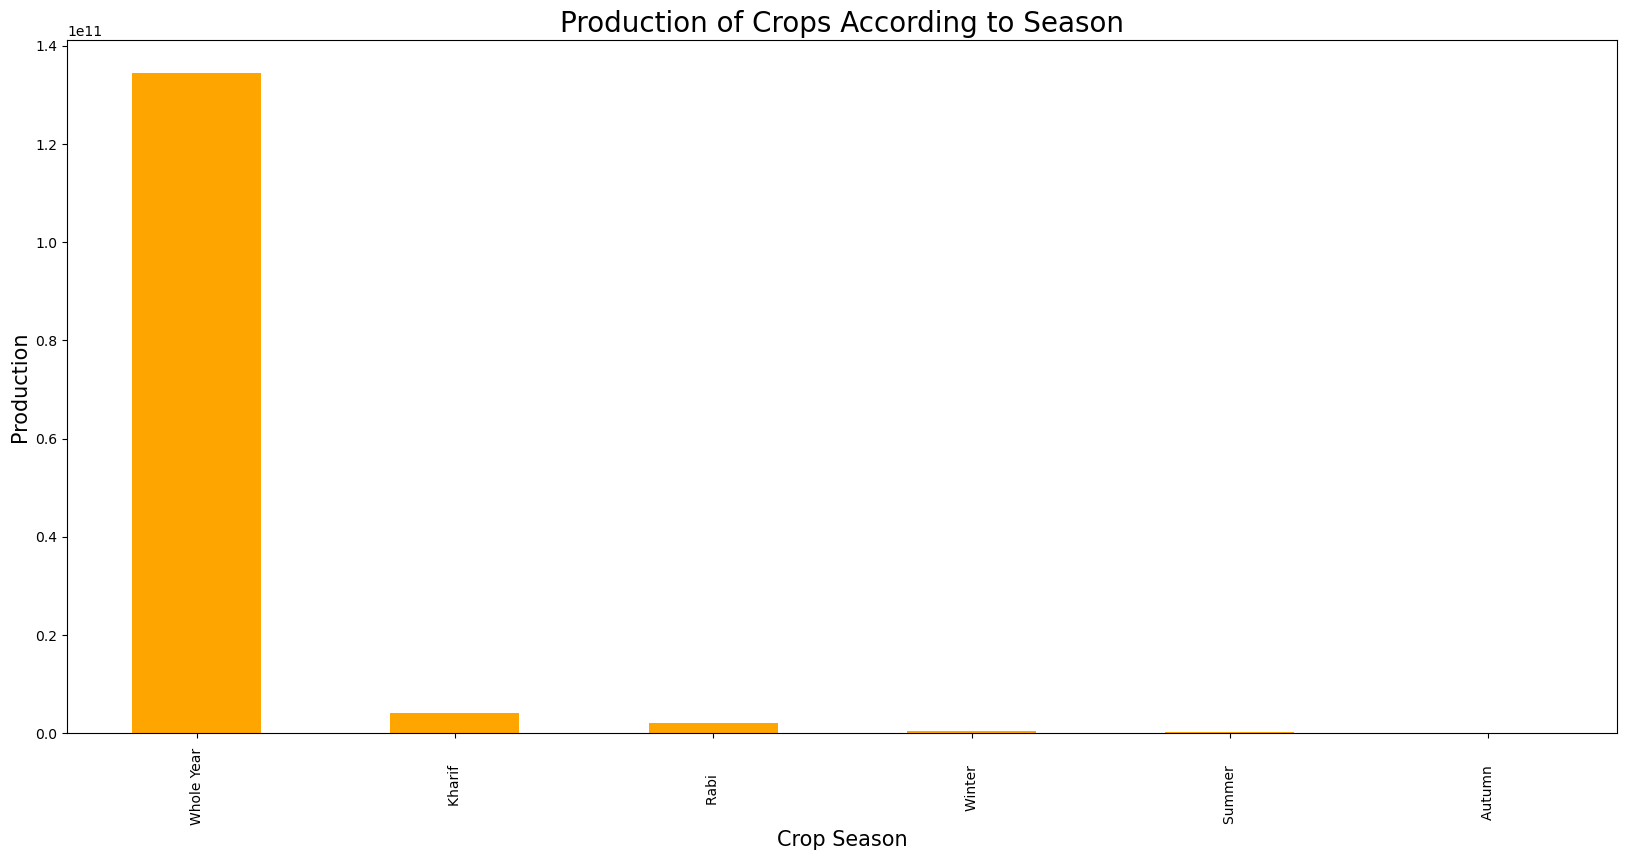

In [27]:
# plot production of crops according to season

plt.figure(figsize = (20,9))
df.groupby("Season")["Production"].sum().sort_values(ascending = False).plot(kind="bar",color = "orange")
plt.title("Production of Crops According to Season",size = 20)
plt.xlabel("Crop Season",size = 15)
plt.ylabel("Production",size = 15)
plt.show()

Most of the crops produced in Kharif season.

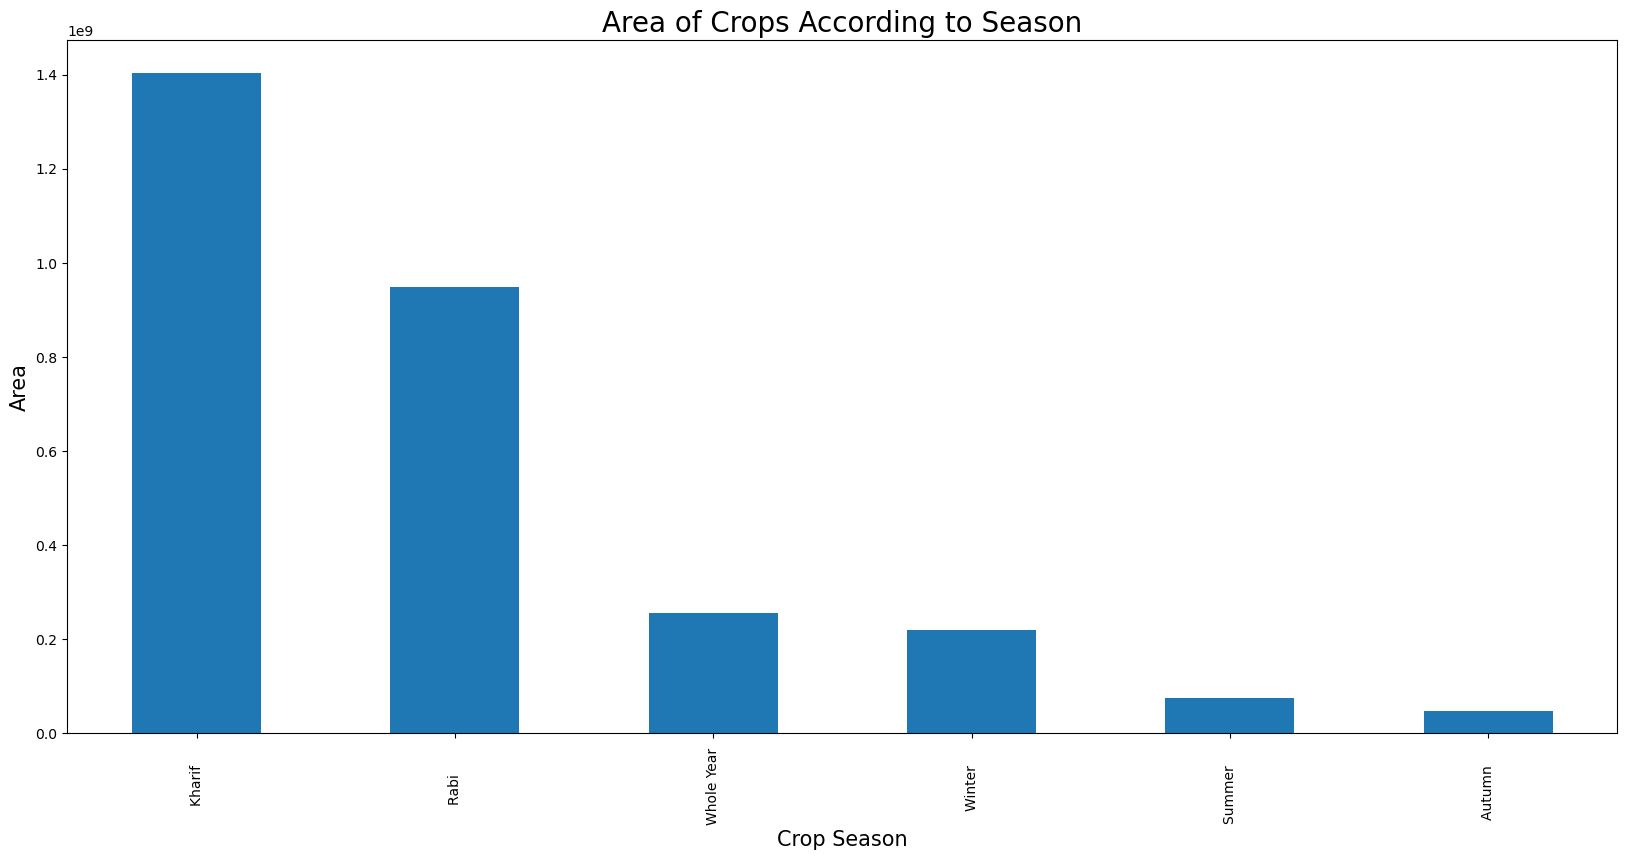

In [28]:
# plot production of crops according to season

plt.figure(figsize = (20,9))
df.groupby("Season")["Area"].sum().sort_values(ascending = False).plot(kind="bar")
plt.title("Area of Crops According to Season",size = 20)
plt.xlabel("Crop Season",size = 15)
plt.ylabel("Area",size = 15)
plt.show()

In kharif season area under cultivation is high compared to other seasons.

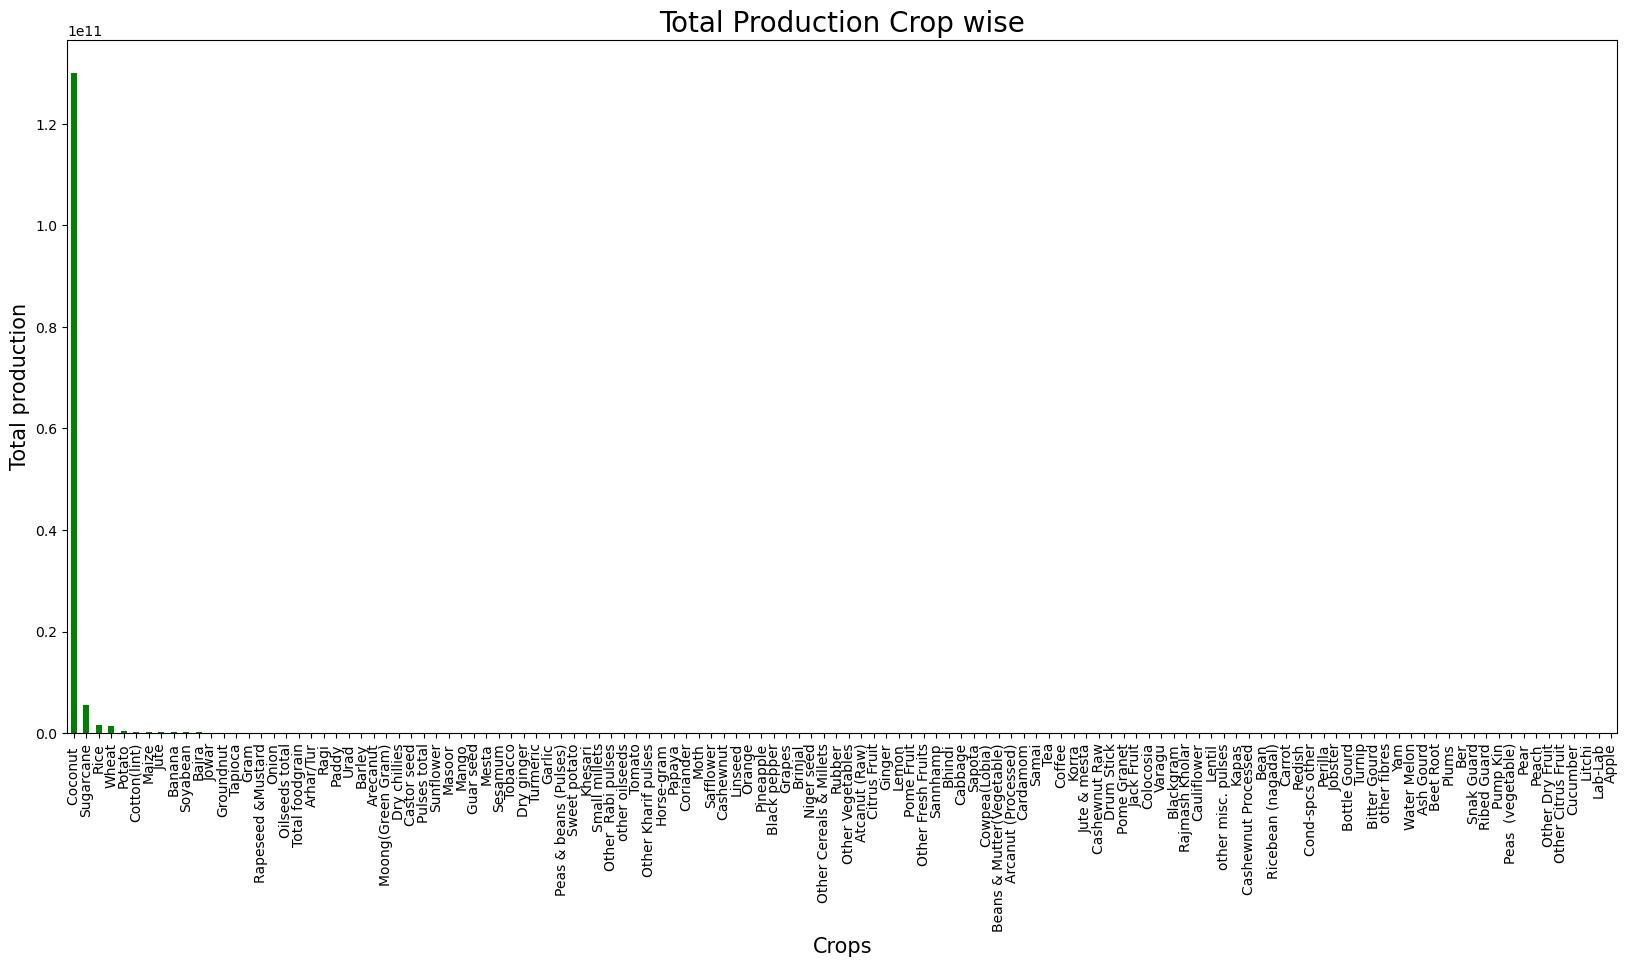

In [29]:
# plot production of crops
plt.figure(figsize=(20,9))
df.groupby('Crop')["Production"].sum().sort_values(ascending=False).plot(kind='bar',color="green")
plt.title('Total Production Crop wise', size=20)
plt.xlabel("Crops",size = 15)
plt.ylabel('Total production',size = 15)
plt.show()

Coconut is highest producing crop in India.

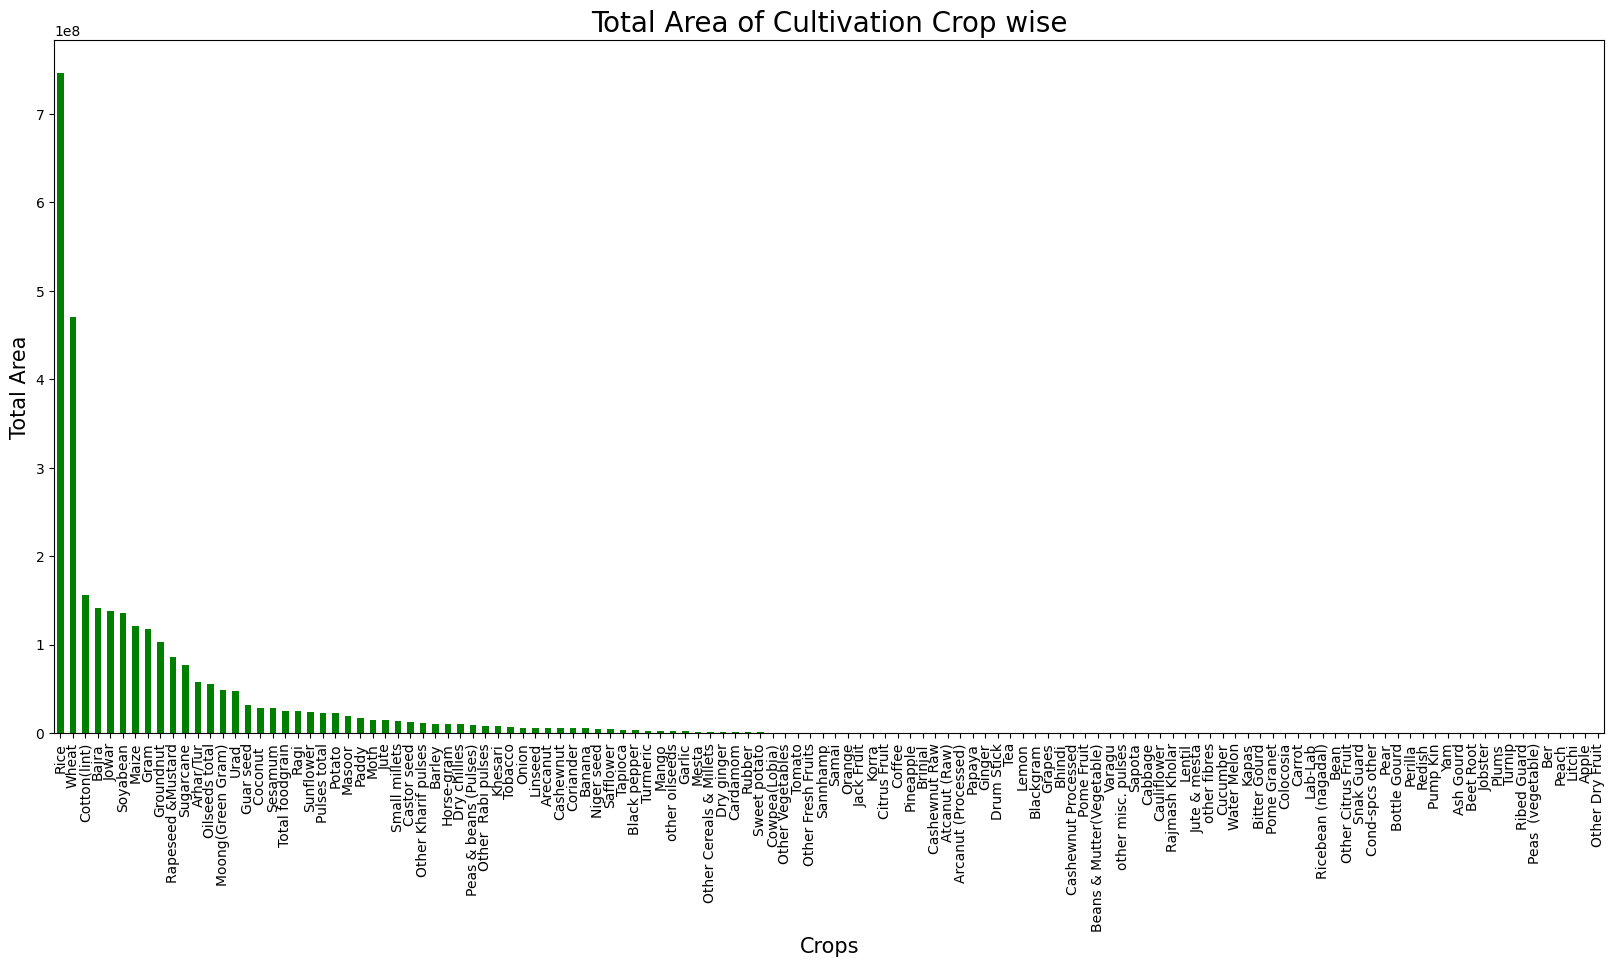

In [30]:
# plot area of cultivation of crops
plt.figure(figsize=(20,9))
df.groupby('Crop')["Area"].sum().sort_values(ascending=False).plot(kind='bar',color="green")
plt.title('Total Area of Cultivation Crop wise', size=20)
plt.xlabel("Crops",size = 15)
plt.ylabel('Total Area',size = 15)
plt.show()

Rice is highly cultivated all over the country.

### Analysis on Highly Producing Crops

In [31]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


## Coconut 

In [32]:
Coconut_df = df[df["Crop"]=="Coconut "]
Coconut_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,None
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,None
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,None
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,None
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,None
...,...,...,...,...,...,...,...,...
245719,West Bengal,PURULIA,2004,Whole Year,Coconut,66.00,296.1,None
245756,West Bengal,PURULIA,2005,Whole Year,Coconut,74.00,311.0,None
245792,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0,None
245837,West Bengal,PURULIA,2007,Whole Year,Coconut,58.00,898000.0,None


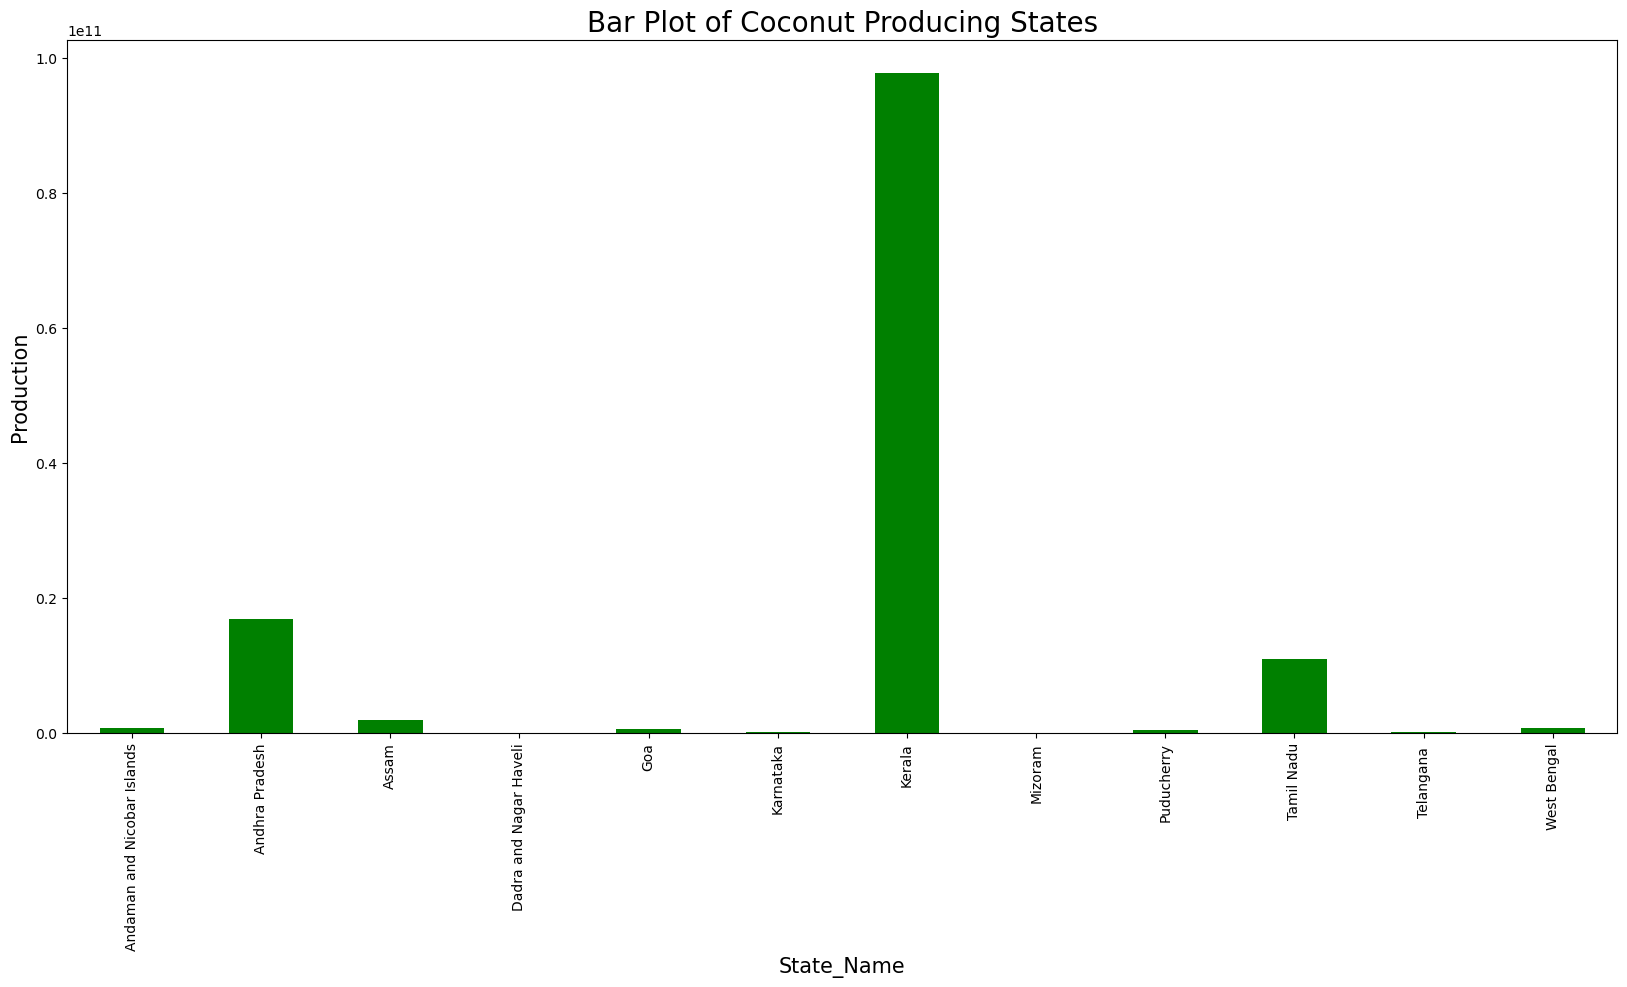

In [33]:
# plot coconut producing states
plt.figure(figsize = (20,9))
Coconut_df.groupby("State_Name")["Production"].sum().plot(kind = "bar",color= "green")
# sns.barplot(x = "State_Name" , y = "Production" , data = Coconut_df)
plt.title("Bar Plot of Coconut Producing States" , size = 20)
plt.xticks(rotation = 90)
plt.xlabel("State_Name" , size = 15)
plt.ylabel("Production" , size = 15)
plt.show()

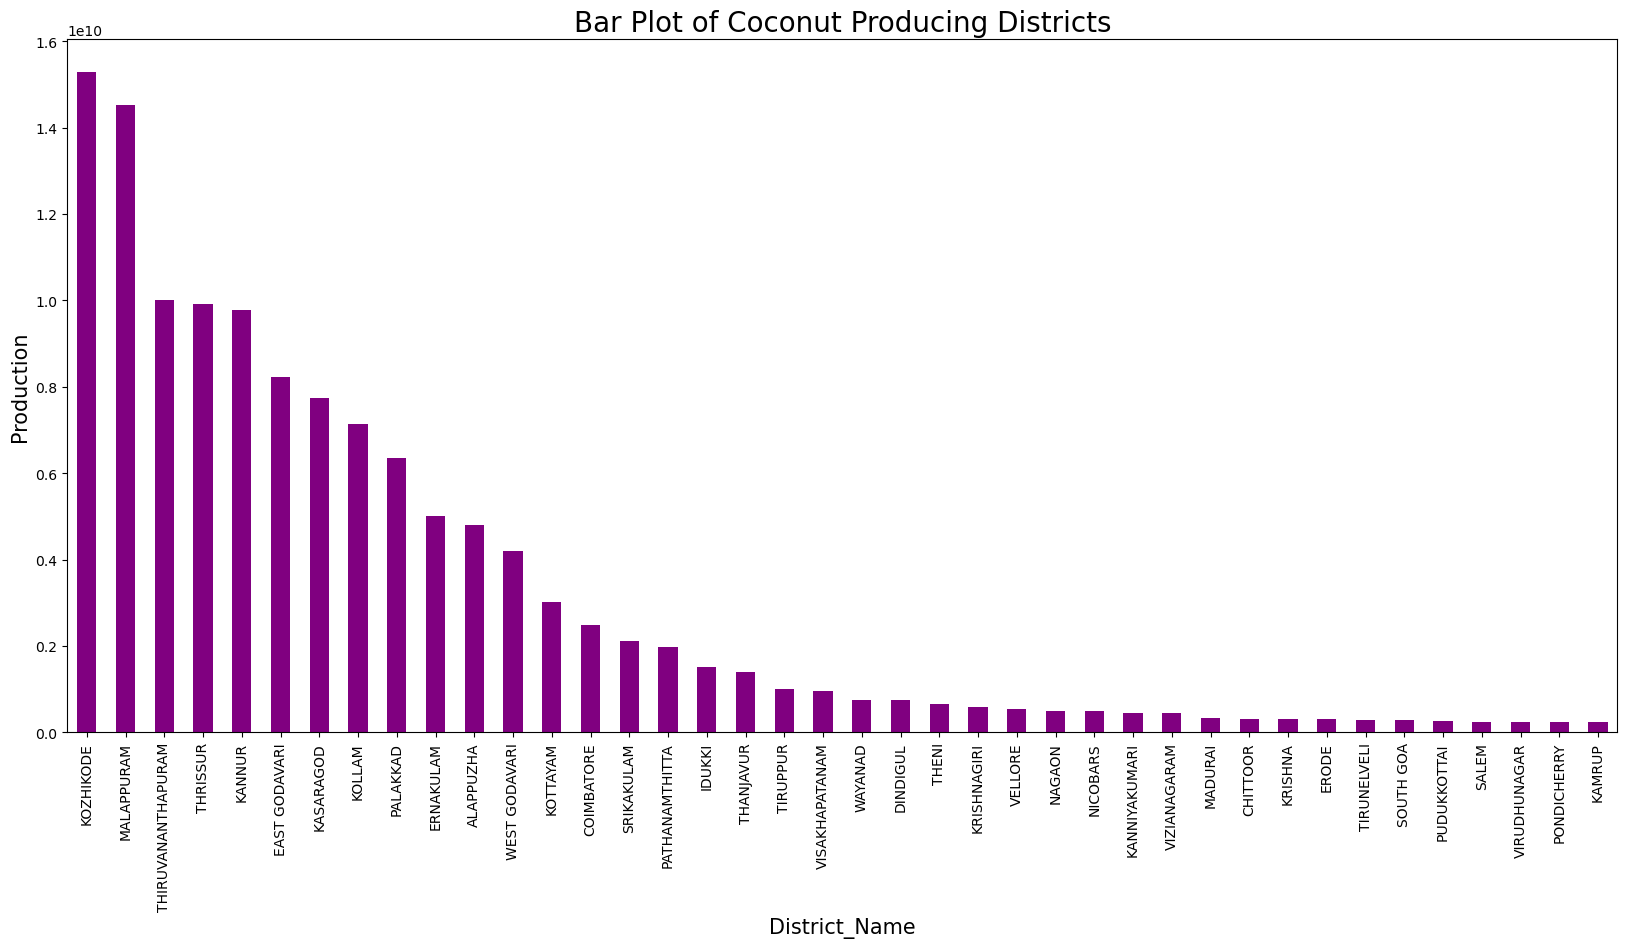

In [34]:
# plot coconut producing districts
plt.figure(figsize = (20,9))
Coconut_df.groupby("District_Name")["Production"].sum().sort_values(ascending = False).head(40).plot(kind="bar",color="purple")
# sns.barplot(x = "State_Name" , y = "Production" , data = Coconut_df)
plt.title("Bar Plot of Coconut Producing Districts" , size = 20)
plt.xticks(rotation = 90)
plt.xlabel("District_Name",size= 15)
plt.ylabel("Production" , size = 15)
plt.show()

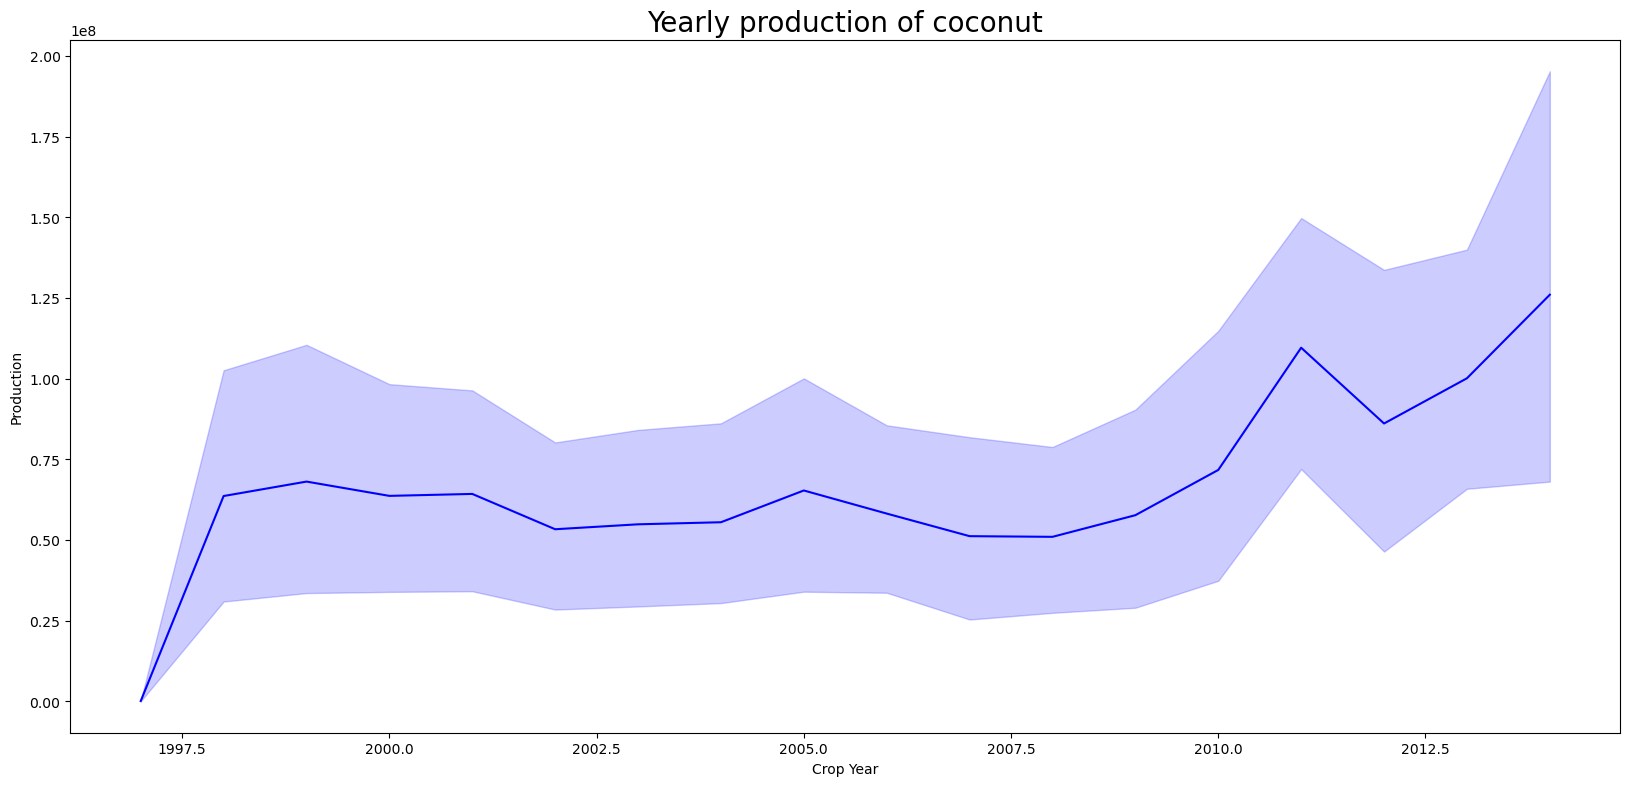

In [35]:
# plot yearly production of coconut

plt.figure(figsize = (20,9))
sns.lineplot(x = "Crop_Year" , y ="Production" ,color = "blue" , data = Coconut_df)
# Coconut_df.groupby("Crop_Year")["Production"].sum().plot(kind = "line")
plt.title("Yearly production of coconut",size = 20)
plt.xlabel("Crop Year")
plt.ylabel("Production")
plt.show()

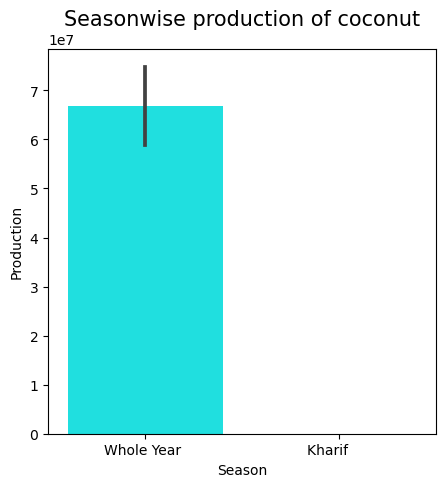

In [36]:
# Plot seasonwise production of coconut
plt.figure(figsize = (5,5))
sns.barplot(x= "Season" , y ="Production" ,color = "cyan" , data = Coconut_df)
plt.title("Seasonwise production of coconut",size = 15)
plt.xlabel("Season")
plt.ylabel("Production")
plt.show()


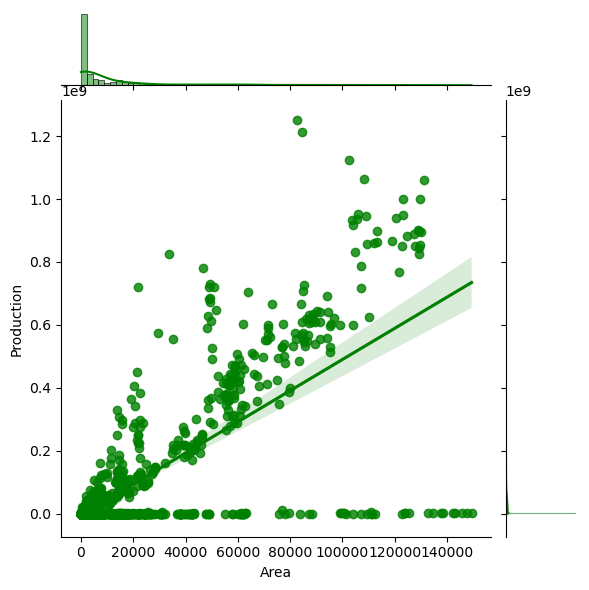

In [37]:
# plot the distribution of coconut production according to area

sns.jointplot(x = "Area",y = "Production",data=Coconut_df ,color = "green" , kind = "reg")
plt.show()


Insights from Coconut crop visualizations:
1. Coconut highly produced in the state Kerala. And the top 3 states are from South region of India.
2. Kozhikode is the district with highest coconut production in the country.
3. Over the year the production of coconut is getting increased but Peak Production for Coconut was in the year 2011.
4. Coconut mostly produced throughout the year but specially in kharif.
5. coconut production is mostly depends on Season, Area, State(place).

### Sugarcane

In [38]:
sg = df[df["Crop"]=="Sugarcane"]
sg

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,Commercial
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,Commercial
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,Commercial
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,Commercial
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,Commercial
...,...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.00,Commercial
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.00,Commercial
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.00,Commercial
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.00,Commercial


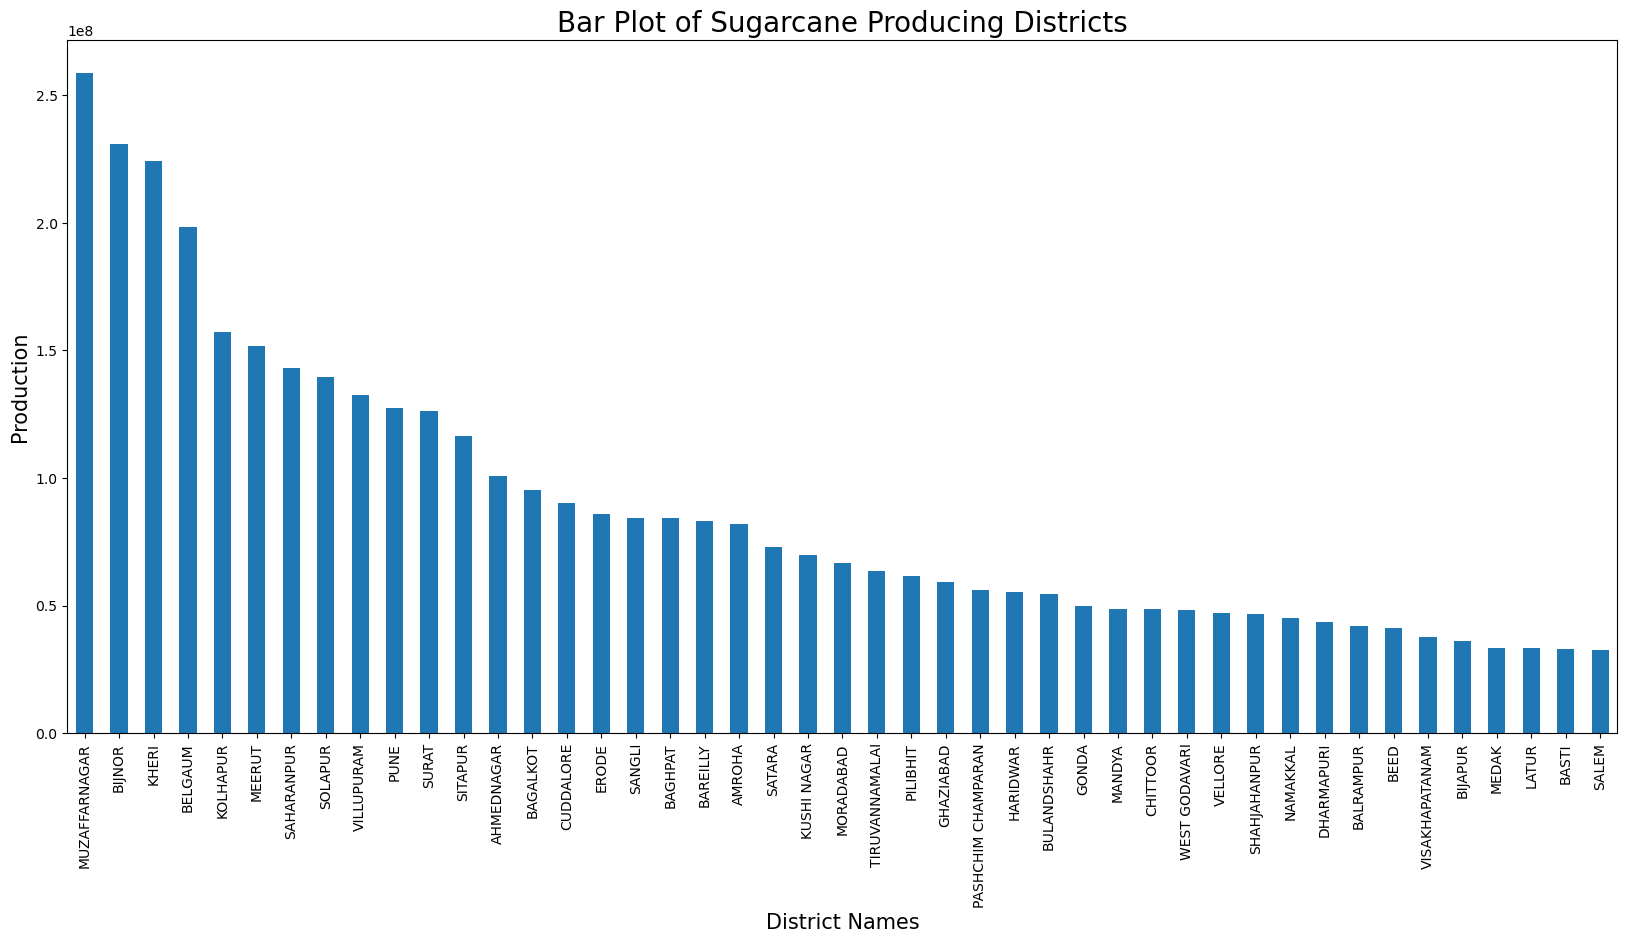

In [39]:
plt.figure(figsize = (20,9))
sg.groupby("District_Name")["Production"].sum().sort_values(ascending = False).head(45).plot(kind = "bar")
plt.title("Bar Plot of Sugarcane Producing Districts",size = 20)
plt.xlabel("District Names" , size = 15)
plt.ylabel("Production" , size = 15)
plt.show()

Muzaffarnagar is highest sugarcane producing district.

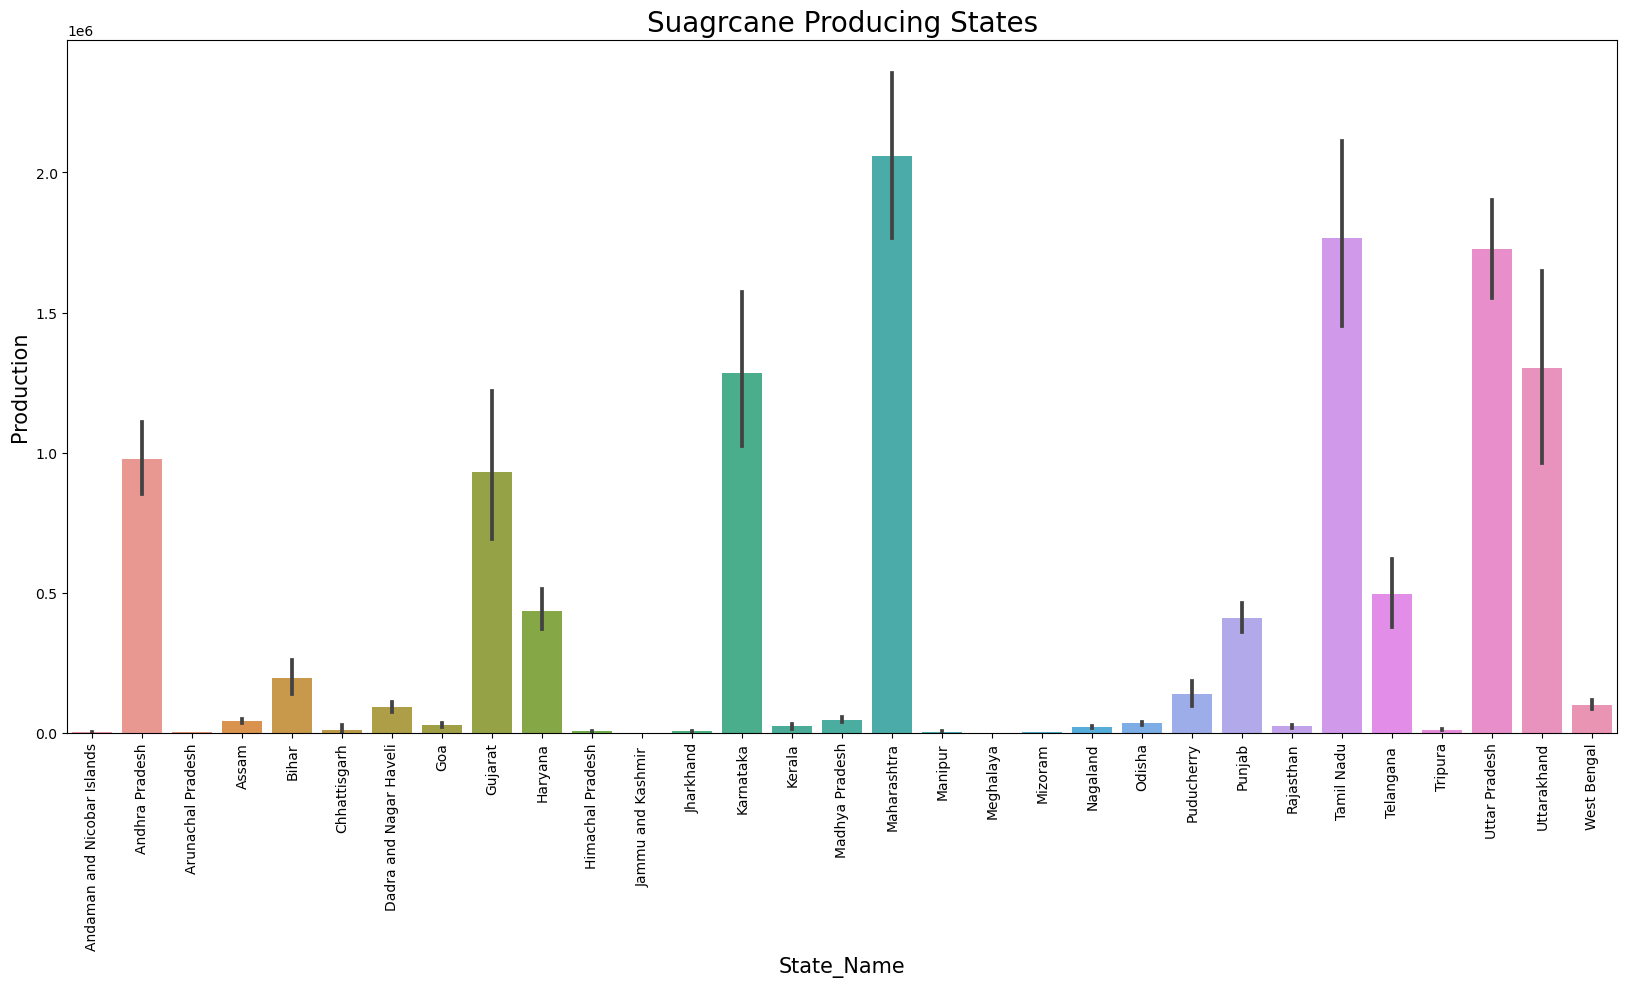

In [40]:
# Print highest sugarcane producing state

plt.figure(figsize=(20,9))
sns.barplot(x = "State_Name" , y = "Production" , data = sg)
plt.title("Suagrcane Producing States" , size = 20)
plt.xticks(rotation = 90)
plt.xlabel("State_Name" , size = 15)
plt.ylabel("Production" , size = 15)
plt.show()

Maharashtra is highest producer of Sugarcane.

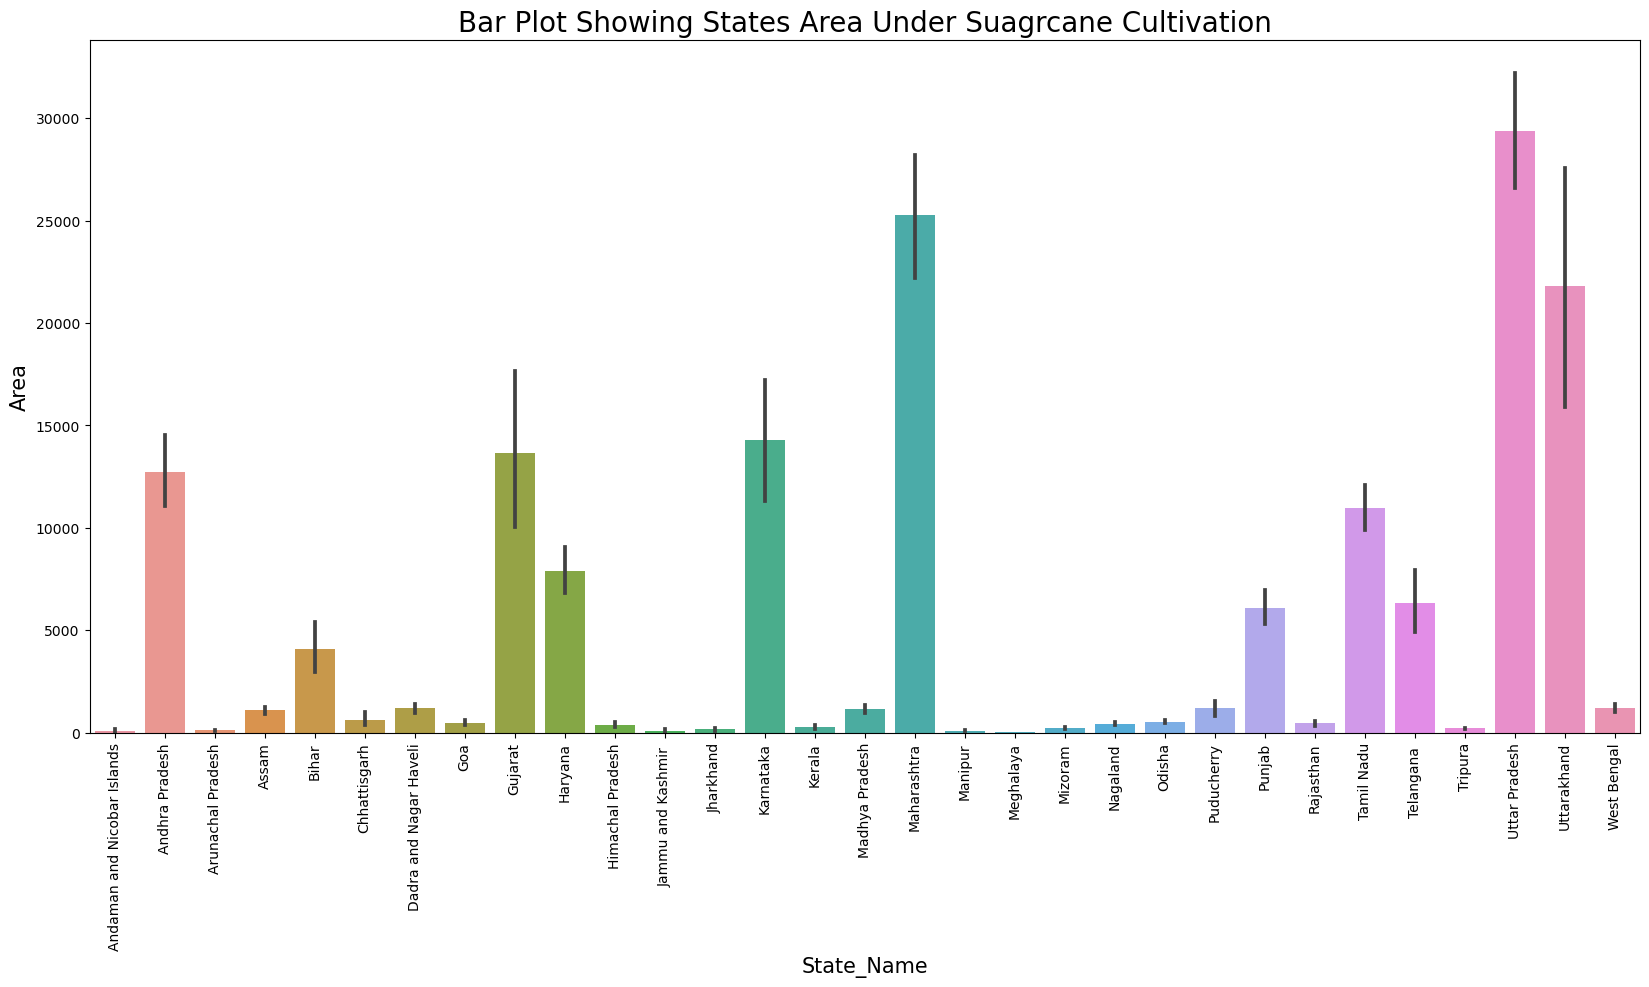

In [41]:
# Plot States Area Under Suagrcane Cultivation

plt.figure(figsize=(20,9))
sns.barplot(x = "State_Name" , y = "Area" , data = sg)
plt.title("Bar Plot Showing States Area Under Suagrcane Cultivation" , size = 20)
plt.xticks(rotation = 90)
plt.xlabel("State_Name" , size = 15)
plt.ylabel("Area" , size = 15)
plt.show()

Here we can conclude that Sugarcane is highly produced in Maharashtra but the area Sugarcane cultivated is larger in Uttar Pradesh.

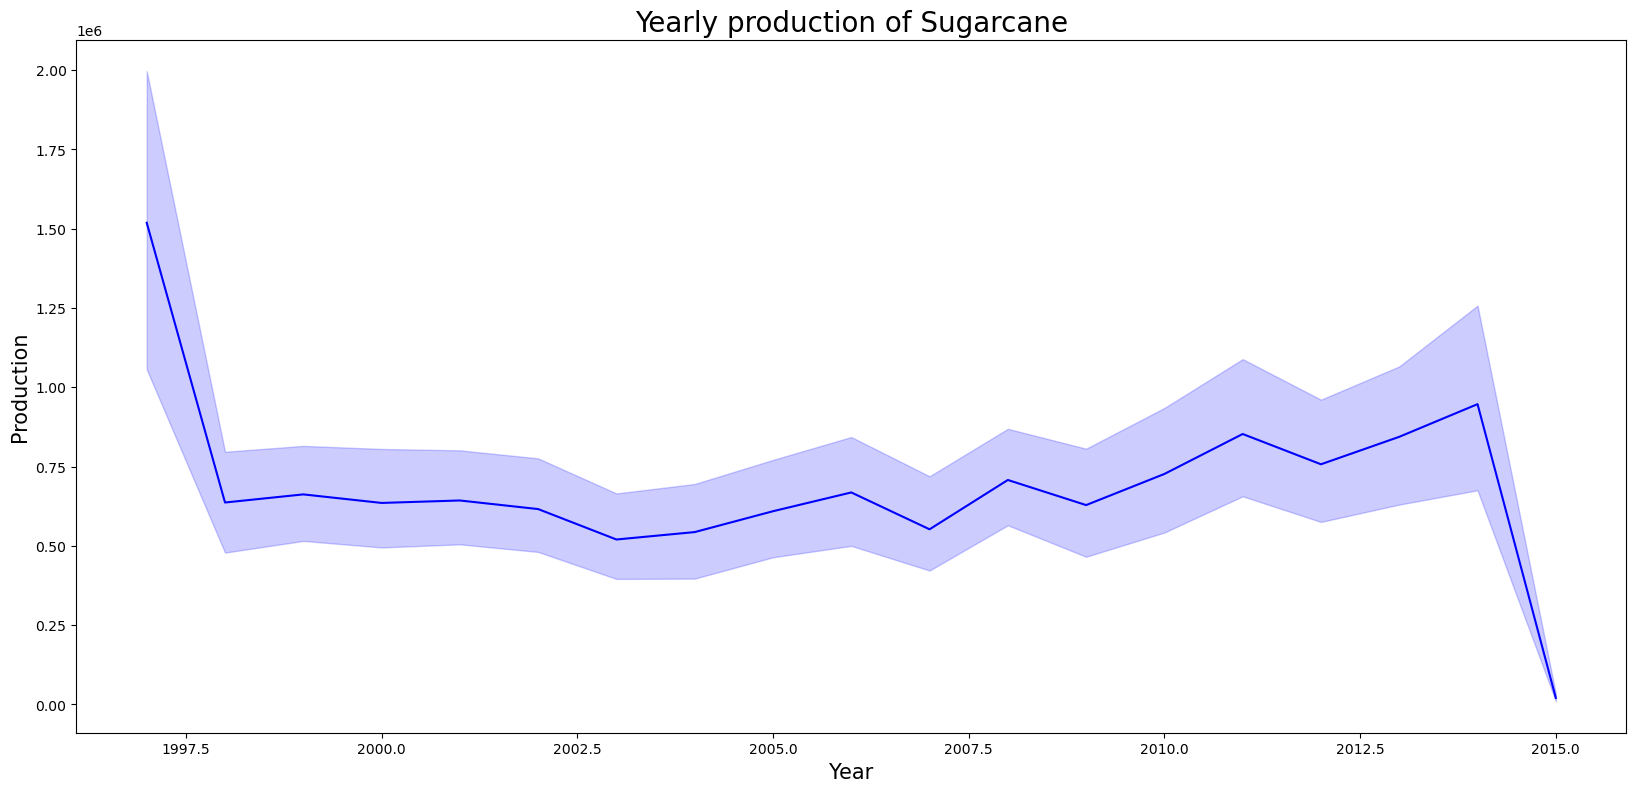

In [42]:
# plot yearly production of sugarcane

plt.figure(figsize = (20,9))
sns.lineplot(x = "Crop_Year" , y = "Production" , data = sg , color = "blue" , markers = True)
plt.title("Yearly production of Sugarcane" , size = 20)
plt.xlabel("Year" , size = 15)
plt.ylabel("Production" , size = 15)
plt.show()

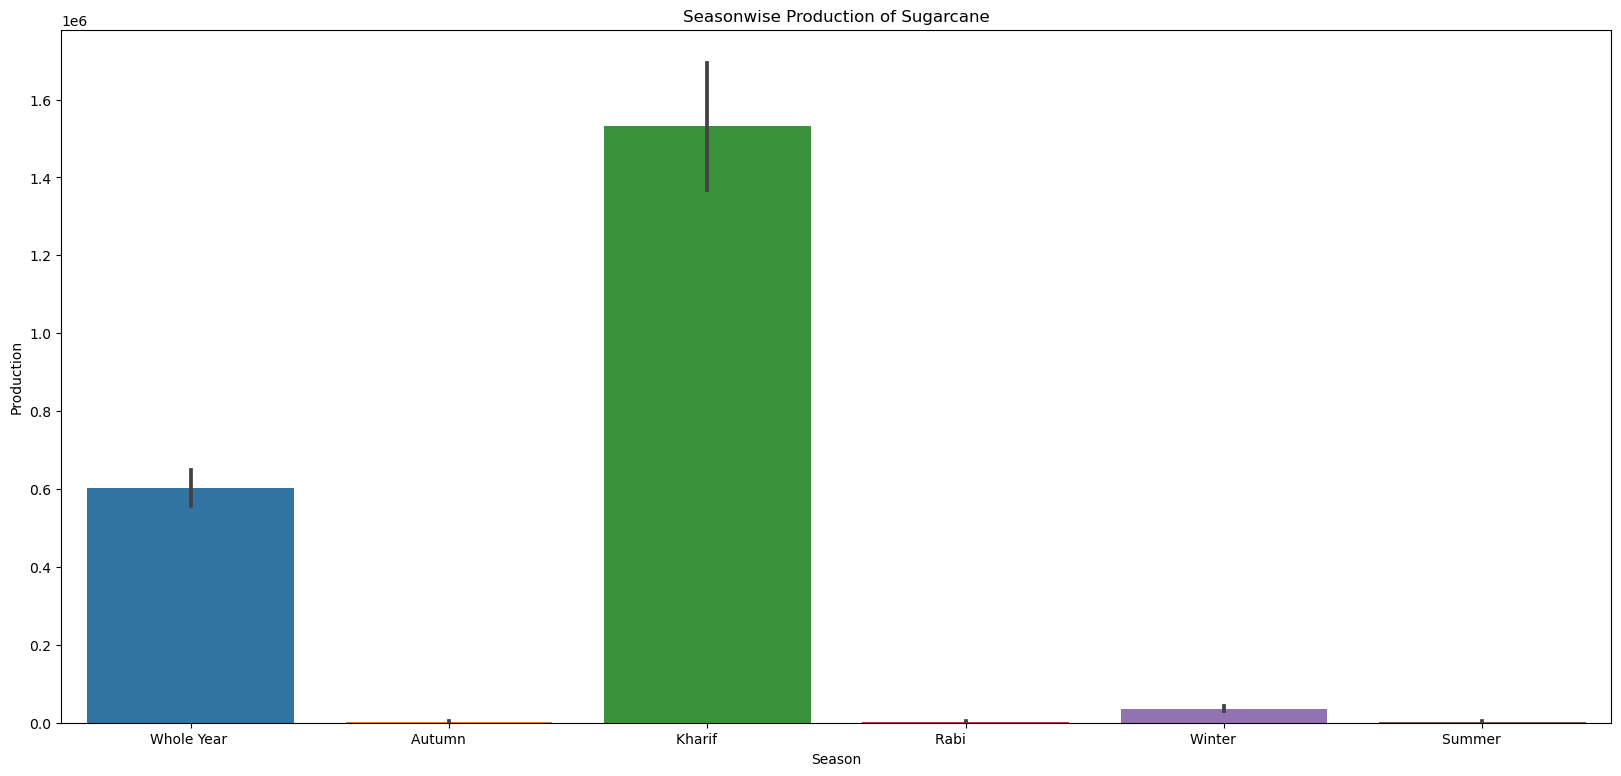

In [43]:
# plot seasonwise production of sugarcane

plt.figure(figsize = (20,9))
sns.barplot(x = "Season" , y = "Production" , data = sg)
plt.title("Seasonwise Production of Sugarcane")
plt.xlabel("Season")
plt.ylabel("Production")
plt.show()

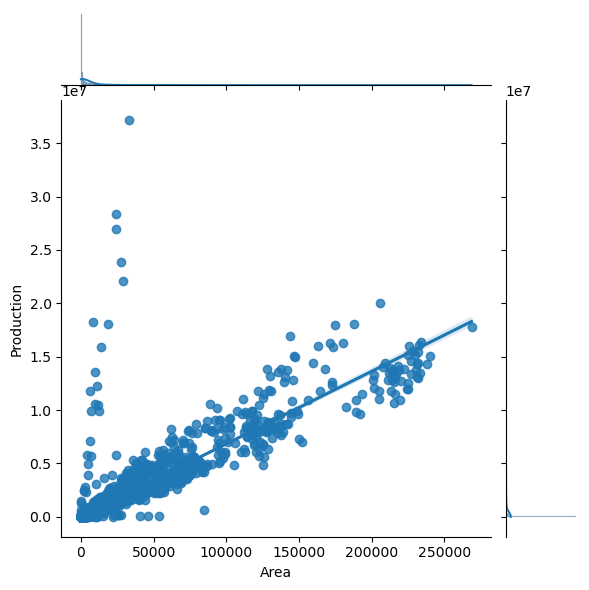

In [44]:
# plot the distribution of Sugarcane production according to area

sns.jointplot(x = "Area",y = "Production",data= sg , kind = "reg")
plt.show()

Sugarcane Visualization Insights:

1.Sugarcane is highly produced in Maharashtra but the area Sugarcane cultivated is larger in Uttar Pradesh.\
2.Muzaffarnagar is highest sugarcane producing district.\
3.After 1998 the production of Sugarcane is getting increased.\
4.It is mainly grown during Kharif season across the countries.\
5.Sugarcane production is mostly depends on Season, Area, State(place).

### Rice

In [45]:
rice = df[df["Crop"]=="Rice"]
rice

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Cereal
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,Cereal
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,Cereal
...,...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00,Cereal
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00,Cereal
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00,Cereal
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,Cereal


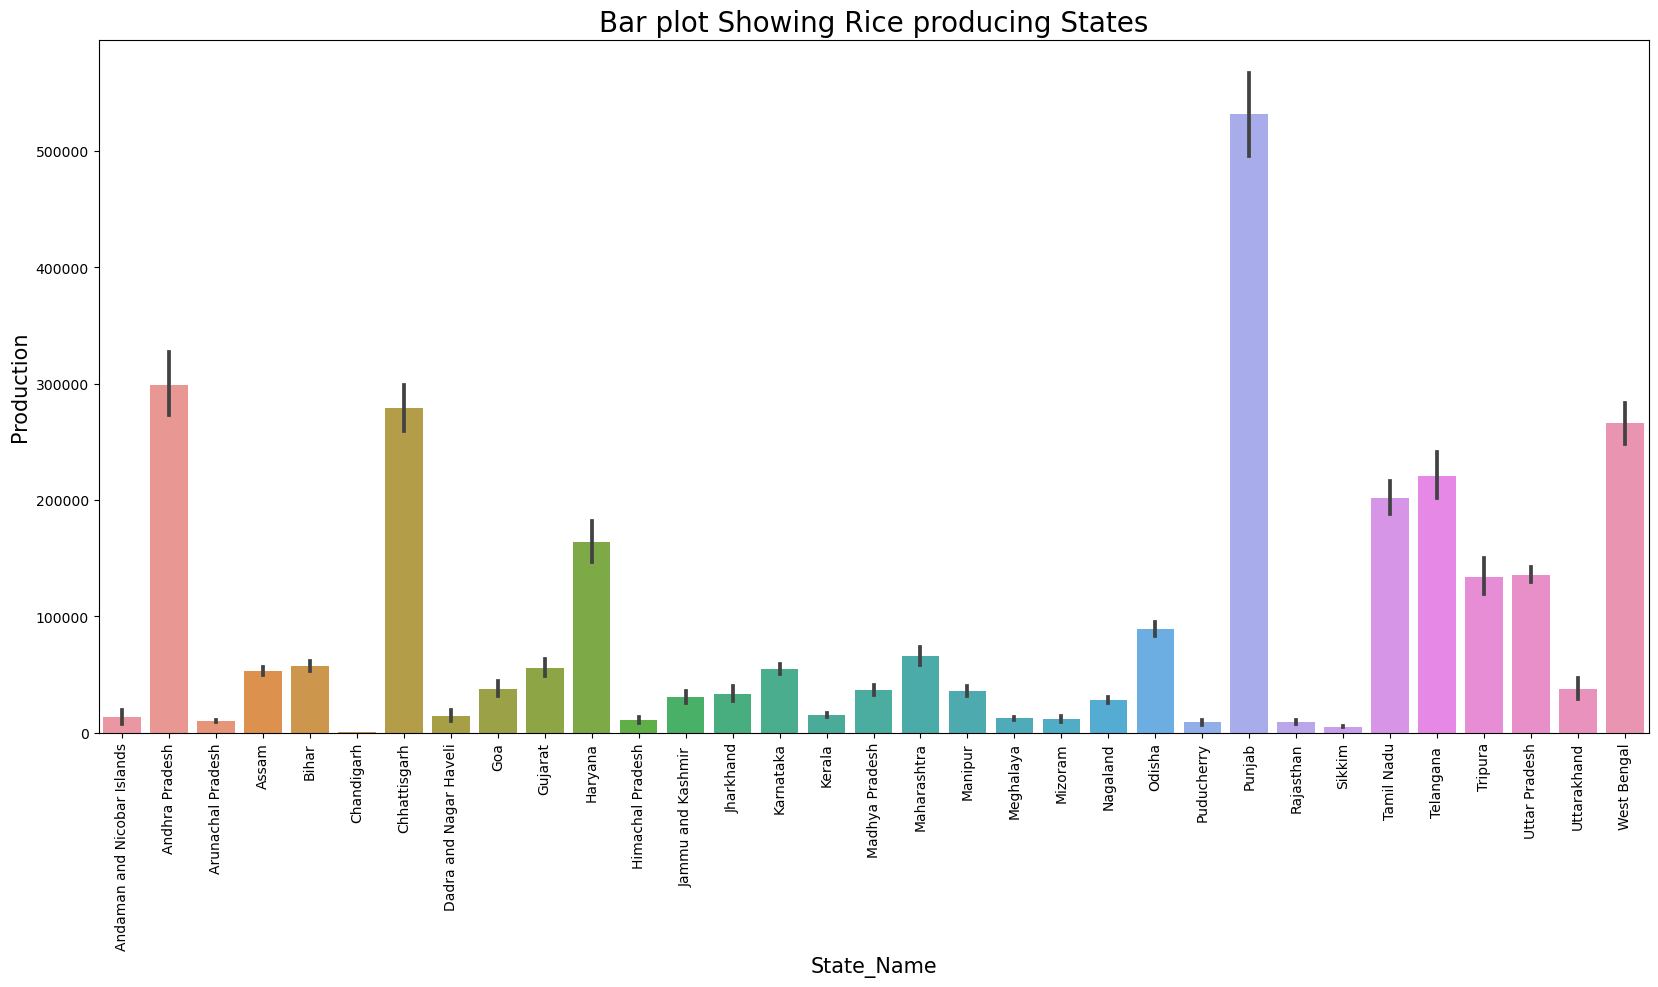

In [46]:
# plot states producing rice

plt.figure(figsize=(20,9))
sns.barplot(x = "State_Name" , y ="Production" , data = rice)
plt.title("Bar plot Showing Rice producing States",size = 20)
plt.xticks(rotation = 90)
plt.xlabel("State_Name",size = 15)
plt.ylabel("Production" , size = 15)
plt.show()

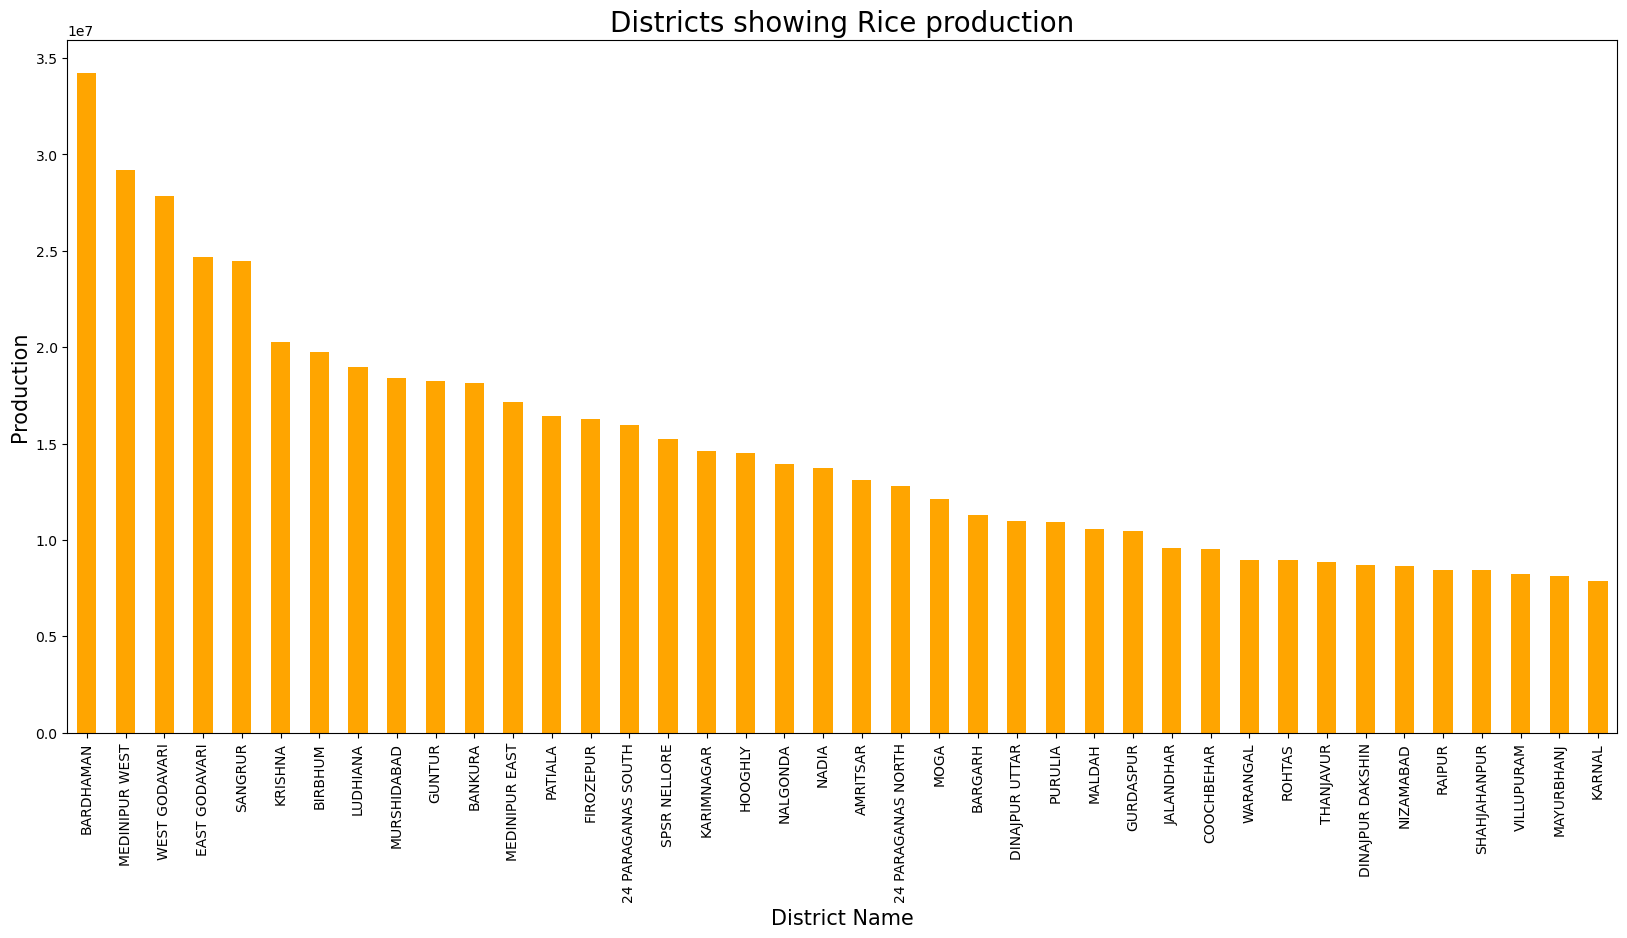

In [47]:
# plot distribution of rice production across districts

plt.figure(figsize=(20,9))
rice.groupby("District_Name")["Production"].sum().sort_values(ascending = False).head(40).plot(kind="bar" , color = "orange")
plt.title("Districts showing Rice production",size = 20)
plt.xlabel("District Name",size = 15)
plt.ylabel("Production",size = 15)
plt.show()

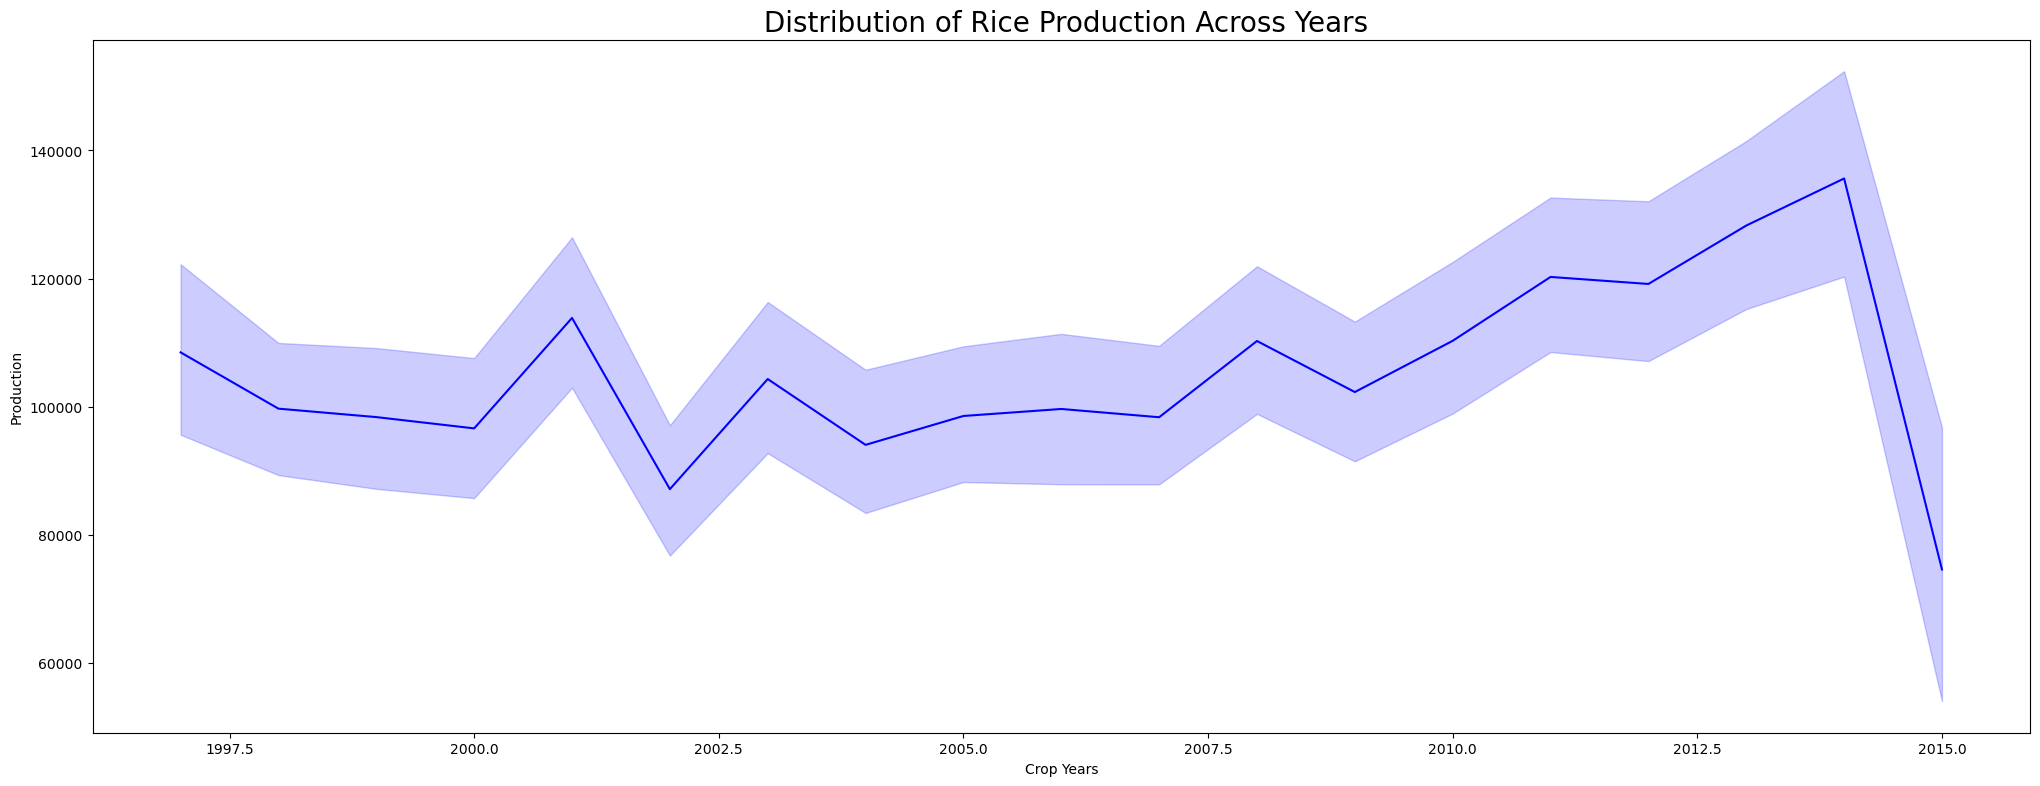

In [48]:
# plot distribution of rice production across years

plt.figure(figsize=(25,9))
sns.lineplot(x = "Crop_Year" , y ="Production" , data = rice , color = "blue" , markers = True)
plt.title(" Distribution of Rice Production Across Years",size = 20)
plt.xlabel("Crop Years")
plt.ylabel("Production")
plt.show()

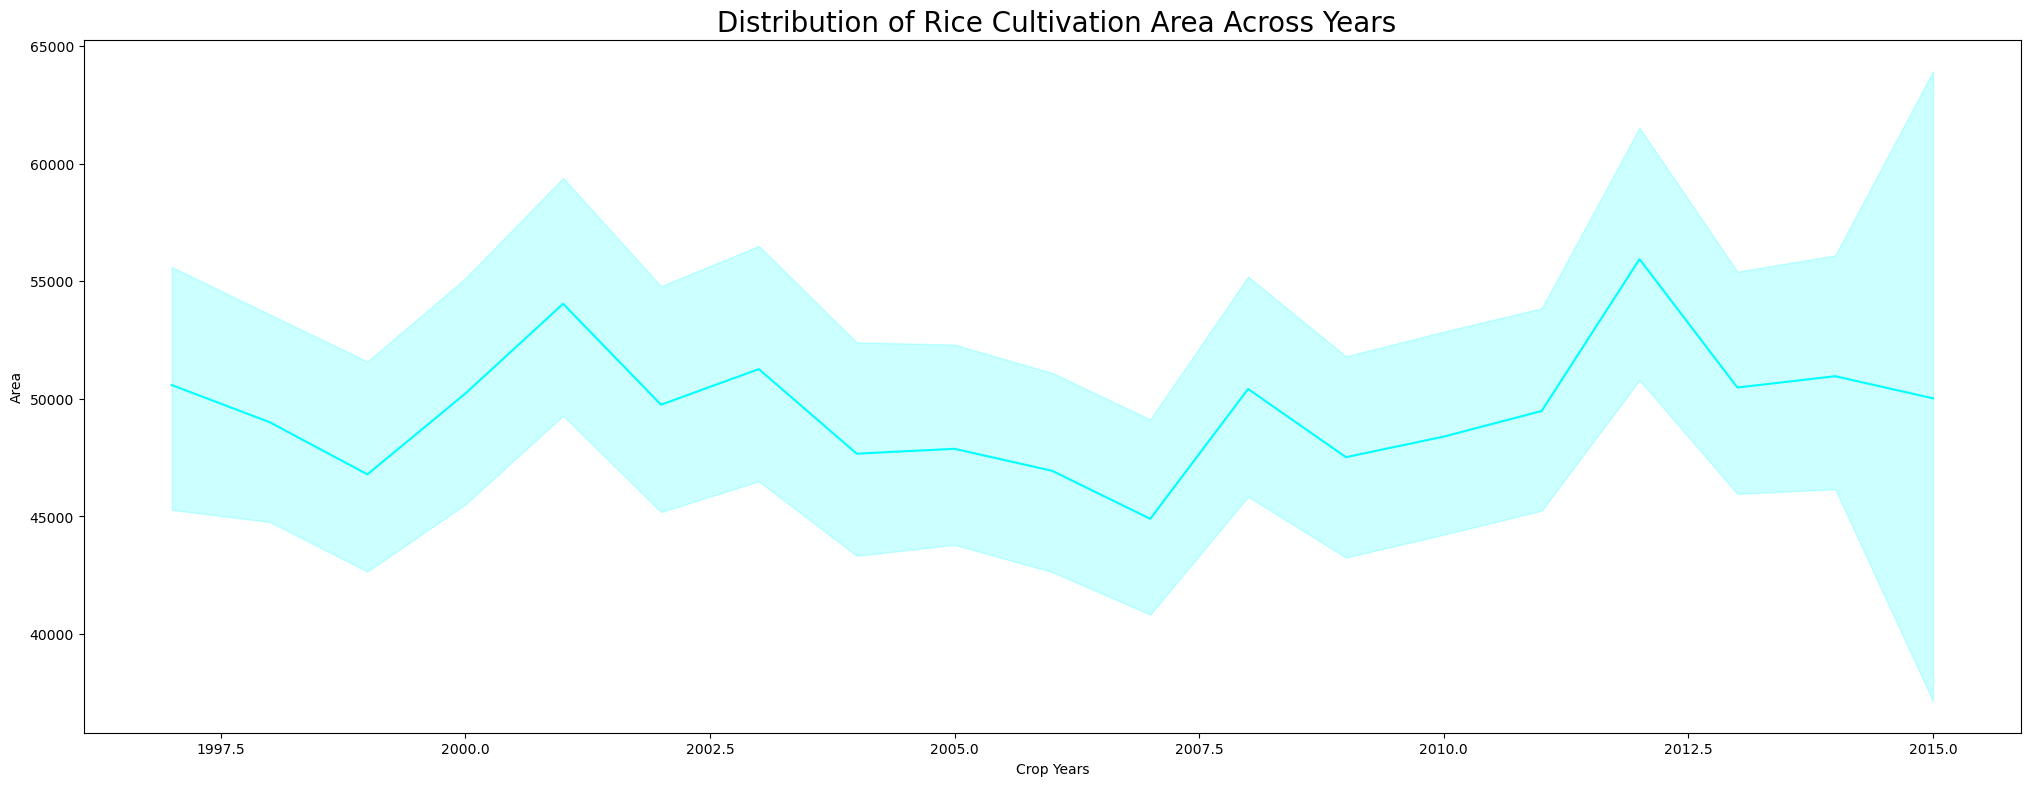

In [49]:
# plot distribution of rice cultivation area across years

plt.figure(figsize=(25,9))
sns.lineplot(x = "Crop_Year" , y ="Area" , data = rice , color = "cyan" , markers = True)
plt.title(" Distribution of Rice Cultivation Area Across Years",size = 20)
plt.xlabel("Crop Years")
plt.ylabel("Area")
plt.show()

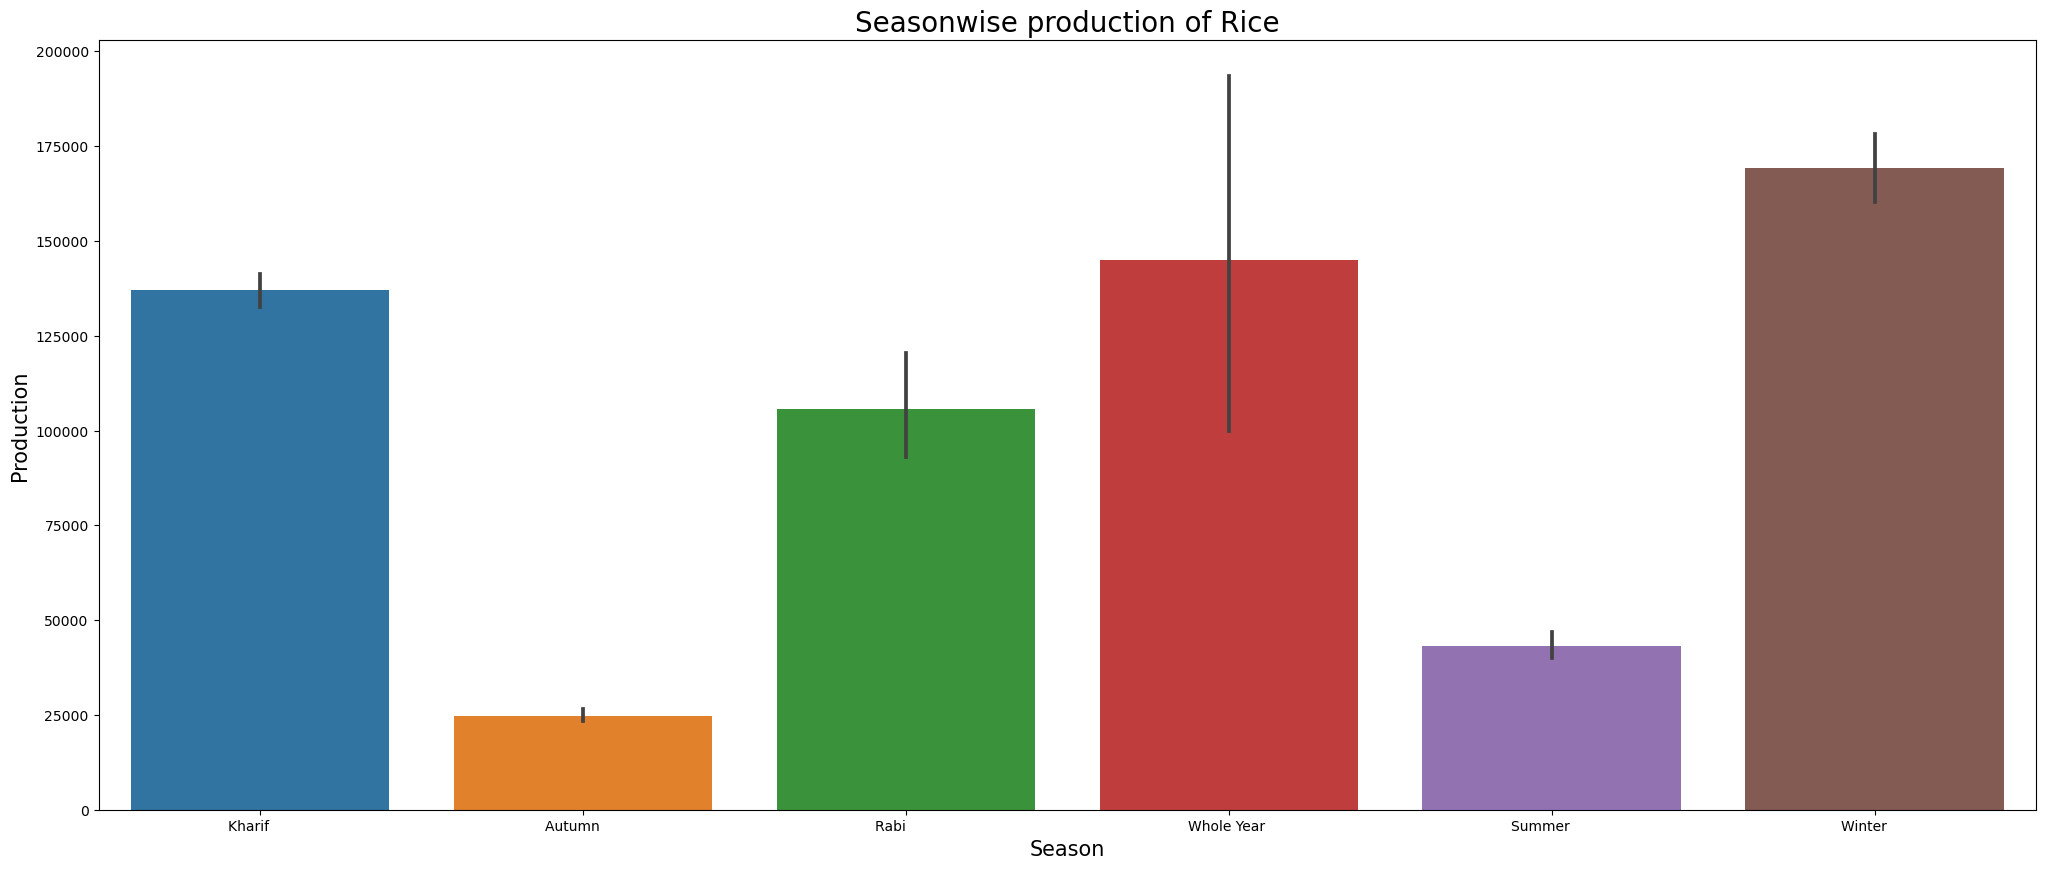

In [50]:
# plot Seasonwise production of Rice
plt.figure(figsize=(25,10))
sns.barplot(x = "Season" , y = "Production" , data = rice)
plt.title("Seasonwise production of Rice",size = 20)
plt.xlabel("Season" ,size =15)
plt.ylabel("Production" , size = 15)
plt.show()

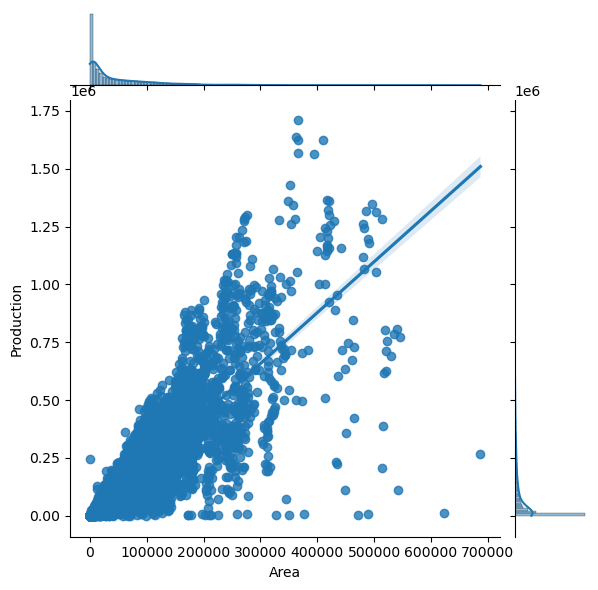

In [51]:
# plot the distribution of Rice production according to area

sns.jointplot(x = "Area",y = "Production",data= rice , kind = "reg")
plt.show()

Insights from above visualizations:
   1. Rice is largly produced in norther part of India. Highest producing state and district is Punjab and Bardhaman(West    Bengal) respectively.
   2. The production of Rice is getting increased as years.
   3. It is mainly grown during Kharif season across the countries.
   4. Also as the area for production is getting increased and the production is also getting increased.
   5. Rice production is also mostly depends on Season, Area, State(place).

## Seasonwise Analysis of crops

### Kharif

In [52]:
season = df["Season"].unique()
season

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [53]:
Kharif = df[df["Season"] == "Kharif     "]
Kharif

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
10,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Arecanut,1254.0,2061.0,Nuts
11,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Other Kharif pulses,2.0,1.0,Pulses
...,...,...,...,...,...,...,...,...
246066,West Bengal,PURULIA,2014,Kharif,Other Kharif pulses,79.0,39.0,Pulses
246067,West Bengal,PURULIA,2014,Kharif,Sannhamp,171.0,727.0,Fibres
246068,West Bengal,PURULIA,2014,Kharif,Soyabean,18.0,7.0,Beans
246069,West Bengal,PURULIA,2014,Kharif,Sunflower,46.0,42.0,Oilseeds


In [54]:
# Total Area cultivated under Kharif season
Area = Kharif["Area"].sum()
rounded_area = int(str(Area)[:4])
print("Area under Cultivation in Kharif Season was",rounded_area,"mha")

Area under Cultivation in Kharif Season was 1403 mha


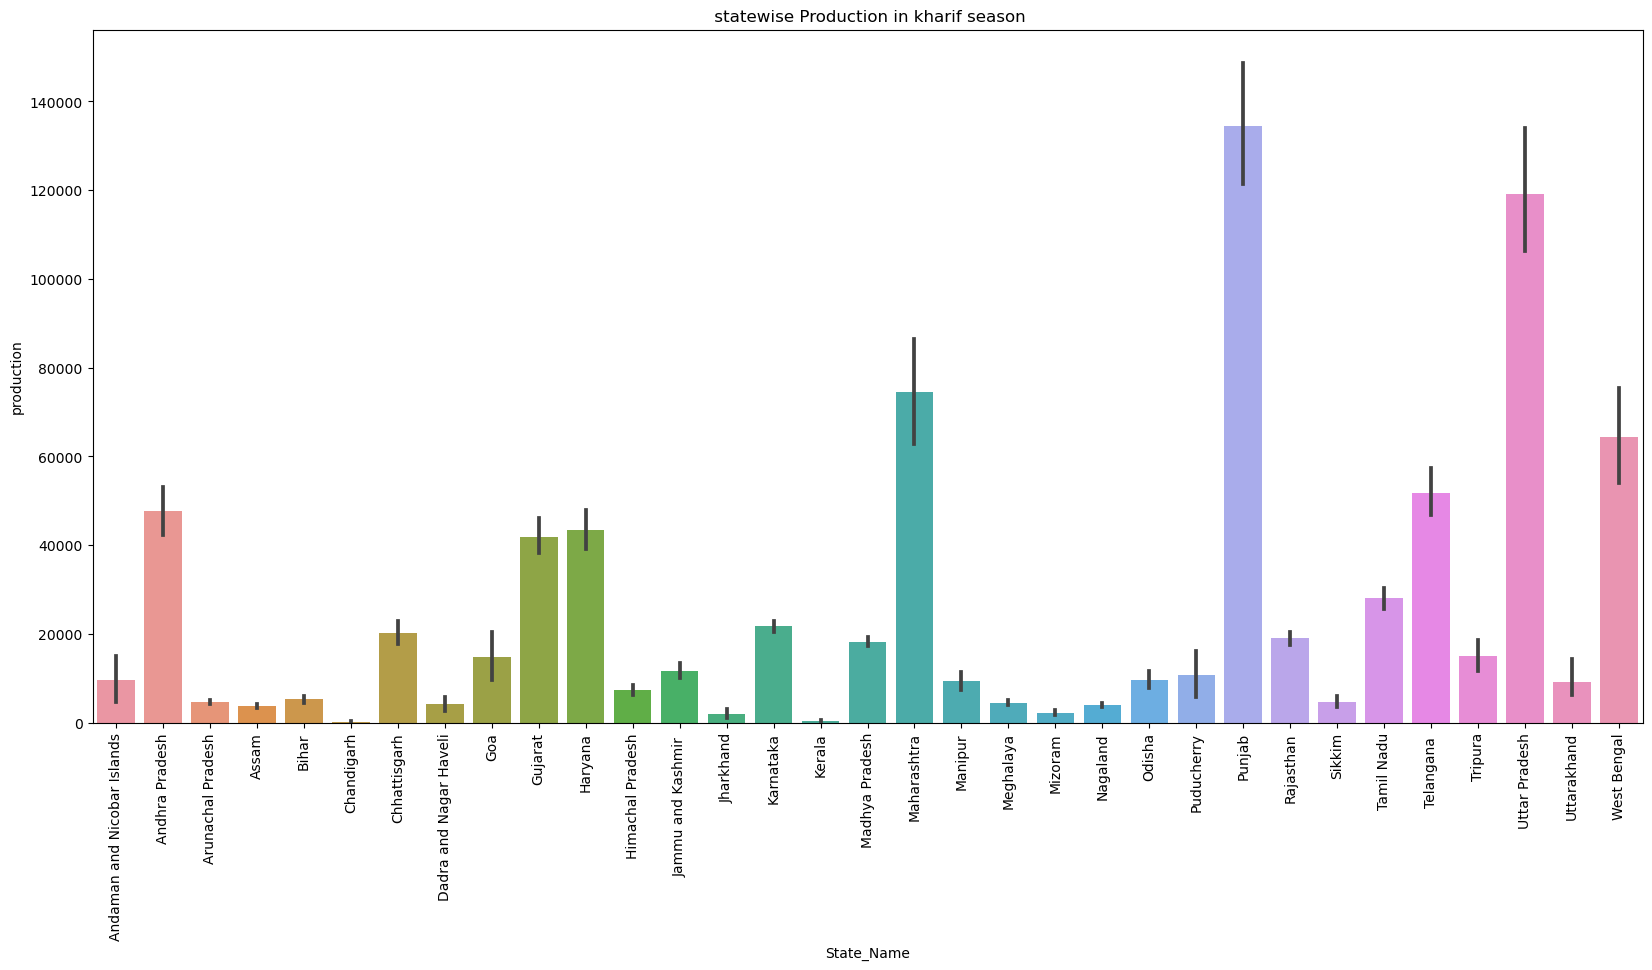

In [55]:
# statewise Production in kharif season

plt.figure(figsize=(20,9))
sns.barplot(x = "State_Name",y ="Production" , data = Kharif)
plt.title(" statewise Production in kharif season")
plt.xticks(rotation=90)
plt.xlabel("State_Name")
plt.ylabel("production")
plt.show()

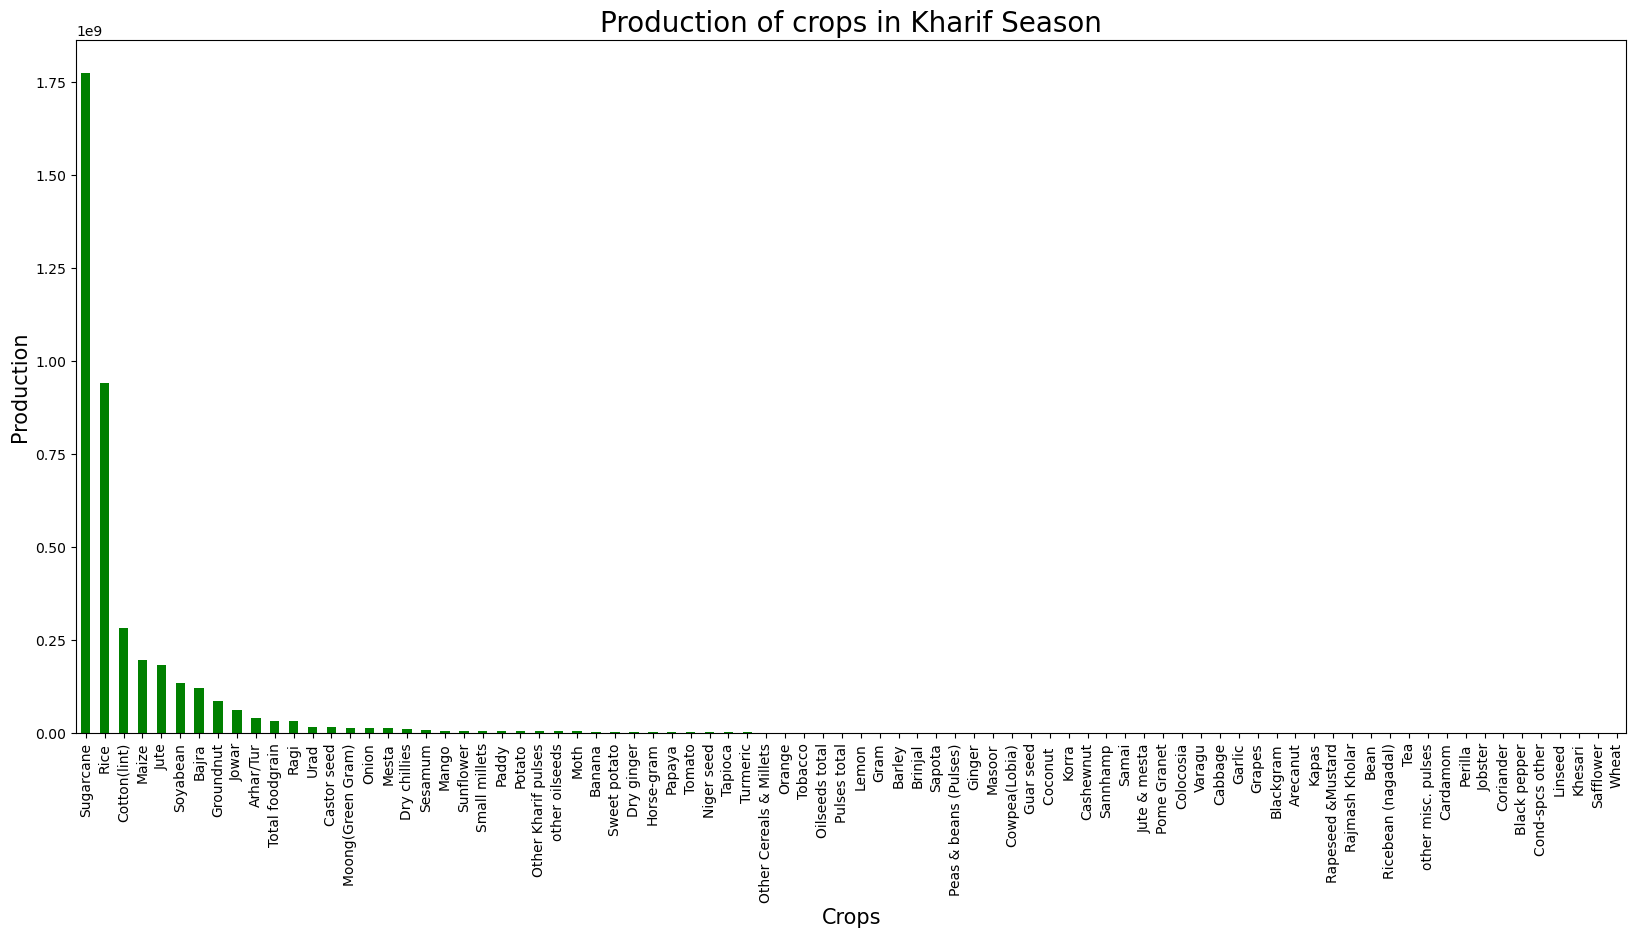

In [56]:
#Production of crops in Kharif Season

plt.figure(figsize=(20,9))
Kharif.groupby("Crop")["Production"].sum().sort_values(ascending = False).plot(kind = "bar" , color = "green")
plt.title("Production of crops in Kharif Season",size = 20)
plt.xlabel("Crops",size = 15)
plt.ylabel("Production",size =15)
plt.show()

In Kharif Season: 
   1. Area Under Cultivation is 1403 mha.
   2. Highest producing state is Punjab.
   3. Mostly Produced crop is Sugarcane.
    

### Rabi

In [57]:
rabi = df[df["Season"]=="Rabi       "]
rabi

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
66,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Arecanut,944.0,1610.00,Nuts
67,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Black pepper,23.0,8.50,Spices
68,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Cashewnut,1000.5,260.50,Nuts
69,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Dry chillies,12.0,25.00,Spices
70,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Dry ginger,7.0,9.64,Spices
...,...,...,...,...,...,...,...,...
246080,West Bengal,PURULIA,2014,Rabi,Potato,477.0,9995.00,Vegetables
246081,West Bengal,PURULIA,2014,Rabi,Rapeseed &Mustard,1885.0,1508.00,Oilseeds
246082,West Bengal,PURULIA,2014,Rabi,Safflower,54.0,37.00,Oilseeds
246083,West Bengal,PURULIA,2014,Rabi,Urad,220.0,113.00,Pulses


In [58]:
# Total Area cultivated under Rabi season
Area = rabi["Area"].sum()
rounded_area = int(str(Area)[:3])
print("Area under Cultivation in Rabi Season was",rounded_area,"mha")

Area under Cultivation in Rabi Season was 947 mha


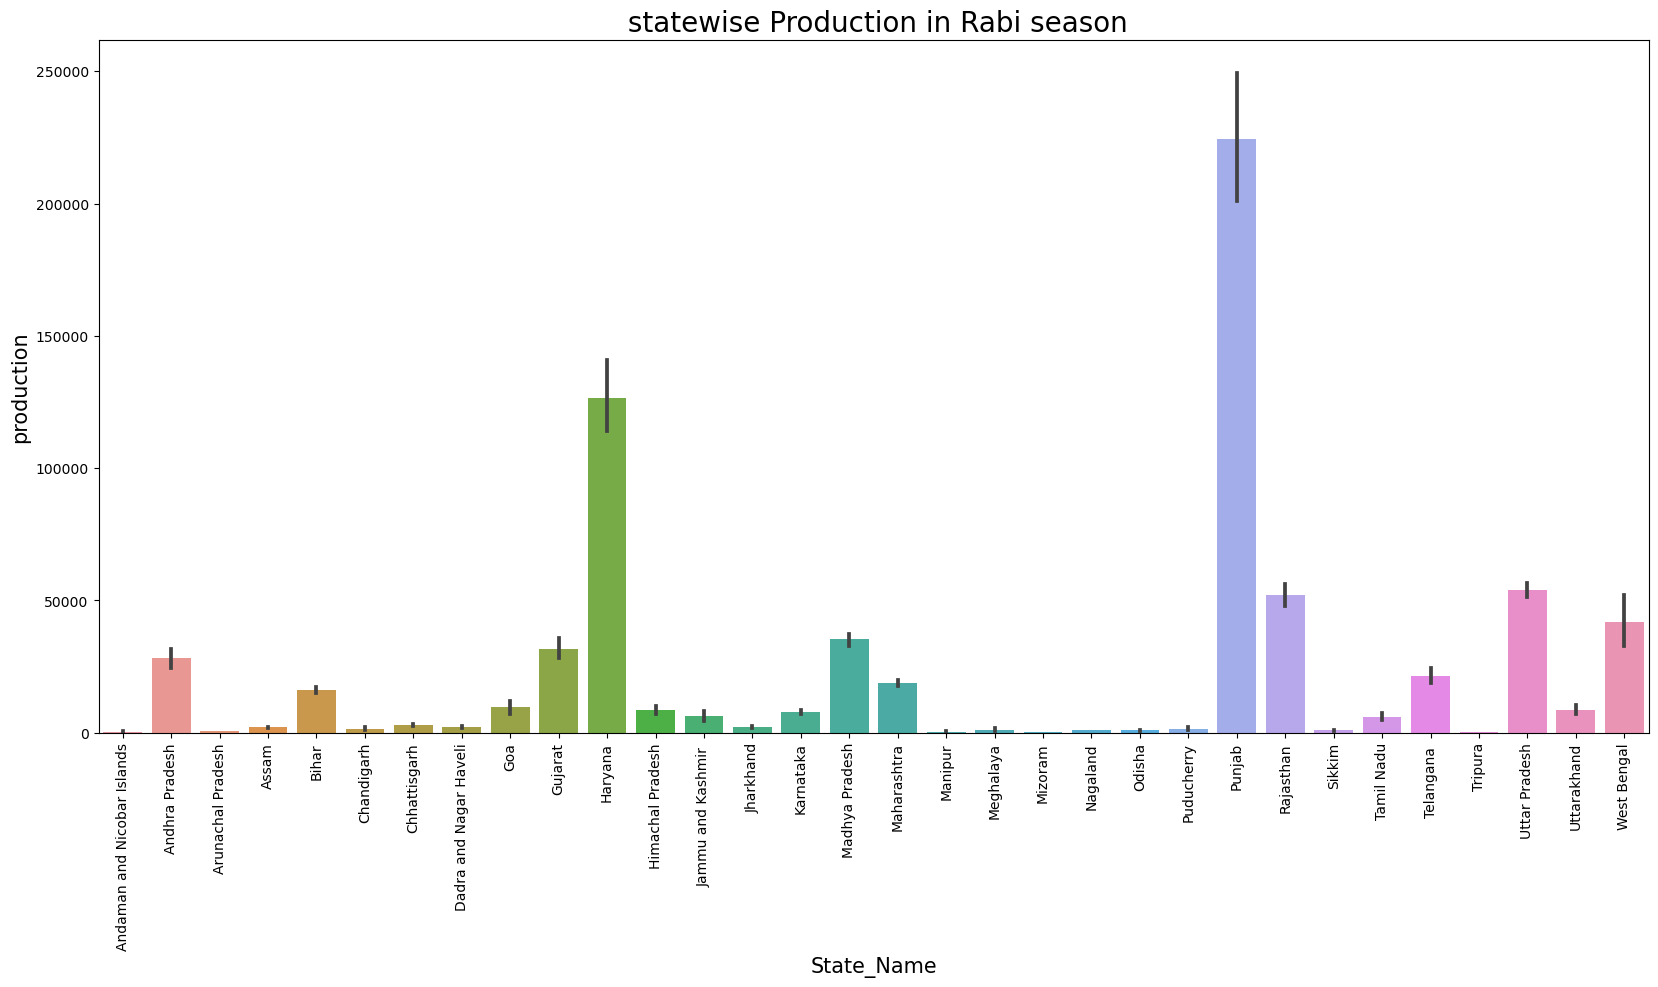

In [59]:
# statewise Production in rabi season

plt.figure(figsize=(20,9))
sns.barplot(x = "State_Name",y ="Production" , data = rabi)
plt.title(" statewise Production in Rabi season",size = 20)
plt.xticks(rotation=90)
plt.xlabel("State_Name",size = 15)
plt.ylabel("production",size = 15)
plt.show()

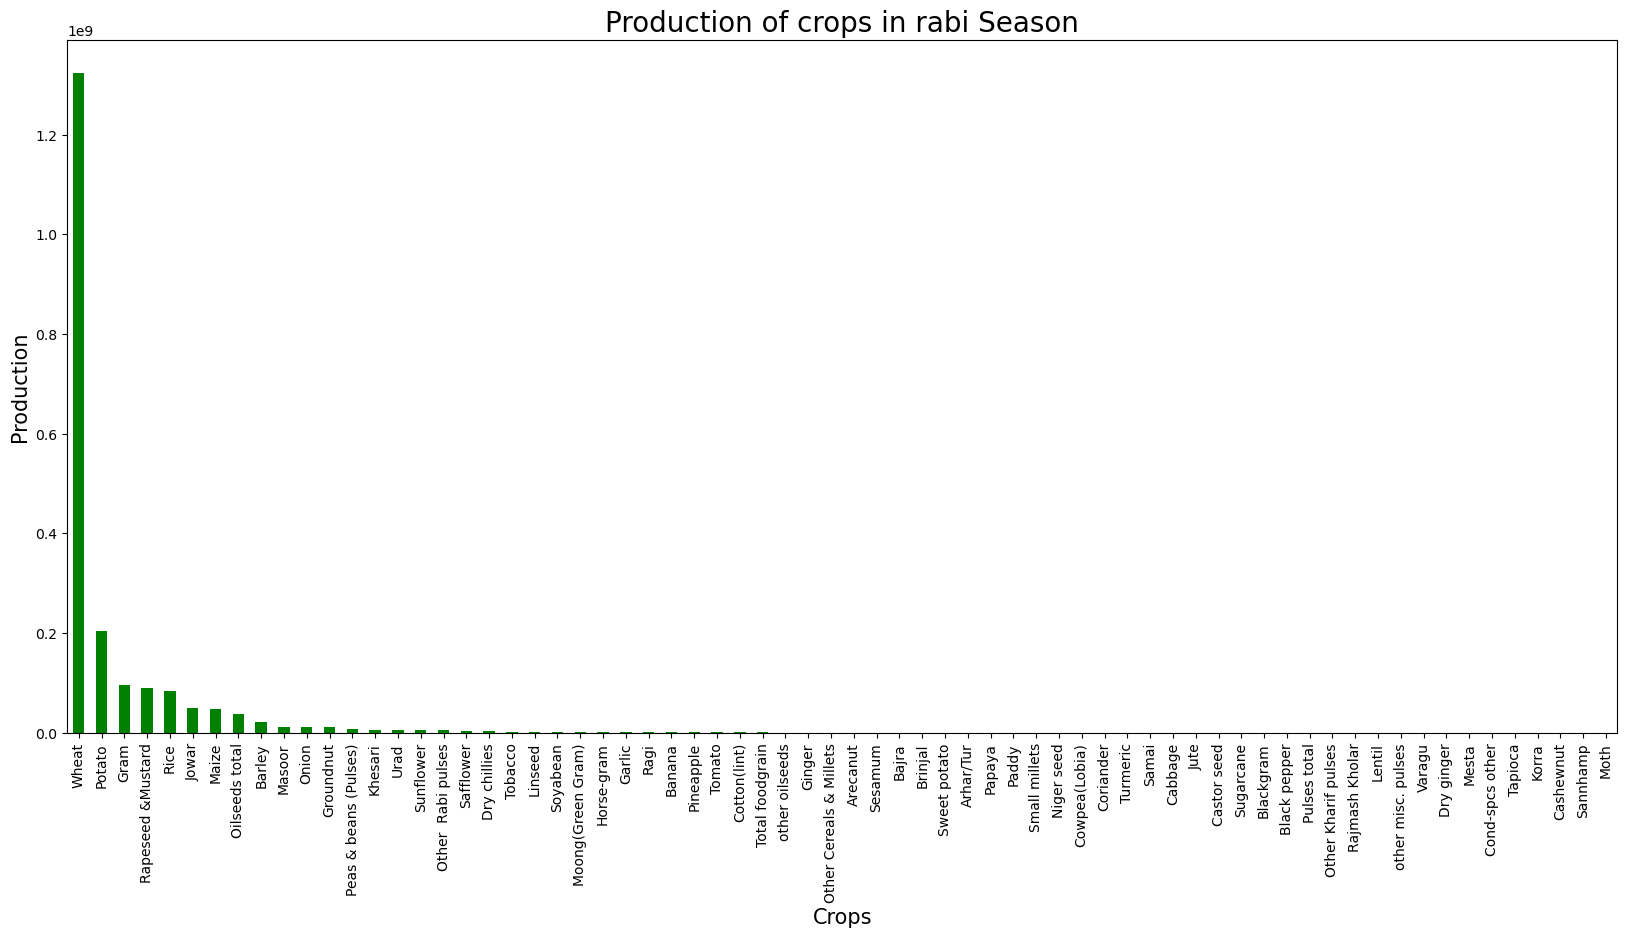

In [60]:
#Production of crops in rabi Season

plt.figure(figsize=(20,9))
rabi.groupby("Crop")["Production"].sum().sort_values(ascending = False).plot(kind = "bar" , color = "green")
plt.title("Production of crops in rabi Season",size = 20)
plt.xlabel("Crops",size= 15)
plt.ylabel("Production",size = 15)
plt.show()

In Rabi Season: 
1. Area Under Cultivation is 947 mha.
2. Highest producing state is Punjab.
3. Mostly Produced crop is Wheat.

### Autumn

In [61]:
autumn = df[df["Season"]=="Autumn     "]
autumn

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
64,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Rice,3.50,10.00,Cereal
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.40,41.75,Commercial
111,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Autumn,Rice,6791.00,20118.00,Cereal
112,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Autumn,Sugarcane,73.33,889.20,Commercial
185,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Autumn,Rice,1595.50,3788.00,Cereal
...,...,...,...,...,...,...,...,...
246056,West Bengal,PURULIA,2014,Autumn,Maize,6317.00,13337.00,Cereal
246057,West Bengal,PURULIA,2014,Autumn,Ragi,112.00,44.00,Cereal
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00,Cereal
246059,West Bengal,PURULIA,2014,Autumn,Sesamum,170.00,87.00,Oilseeds


In [62]:
# Total Area cultivated under Autumn season
Area = autumn["Area"].sum()
rounded_area = int(str(Area)[:2])
print("Area under Cultivation in Autumn Season was",rounded_area,"mha")

Area under Cultivation in Autumn Season was 48 mha


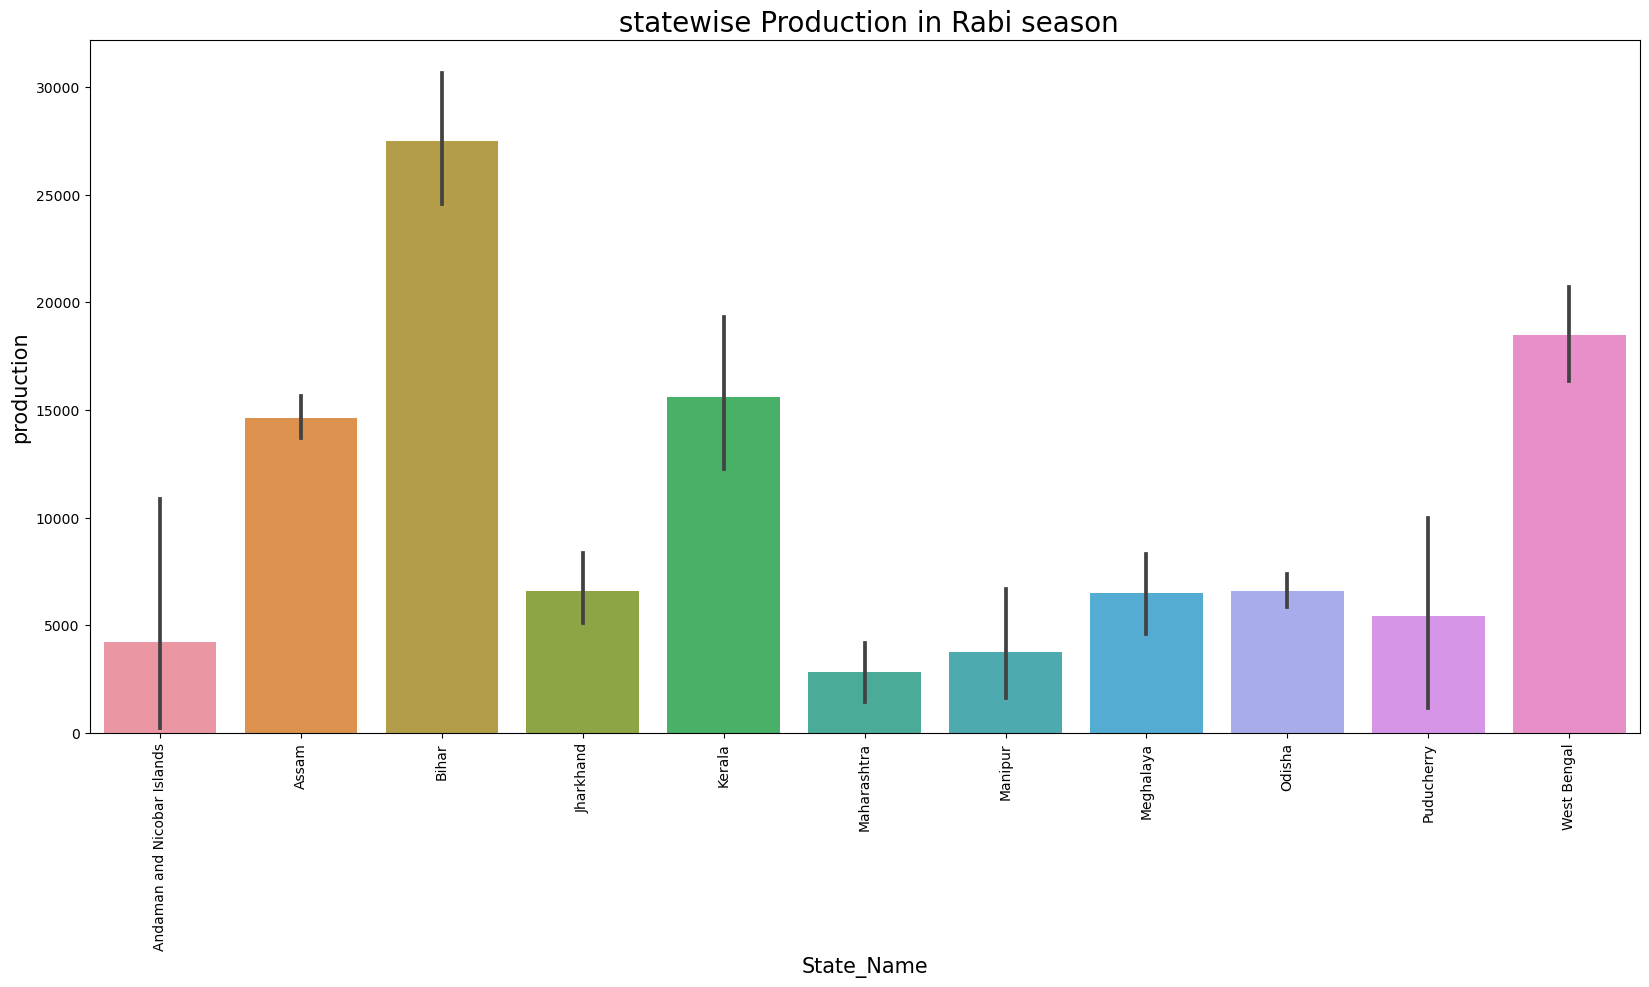

In [63]:
# statewise Production in autumn season

plt.figure(figsize=(20,9))
sns.barplot(x = "State_Name",y ="Production" , data = autumn)
plt.title(" statewise Production in Rabi season",size = 20)
plt.xticks(rotation=90)
plt.xlabel("State_Name",size = 15)
plt.ylabel("production",size = 15)
plt.show()

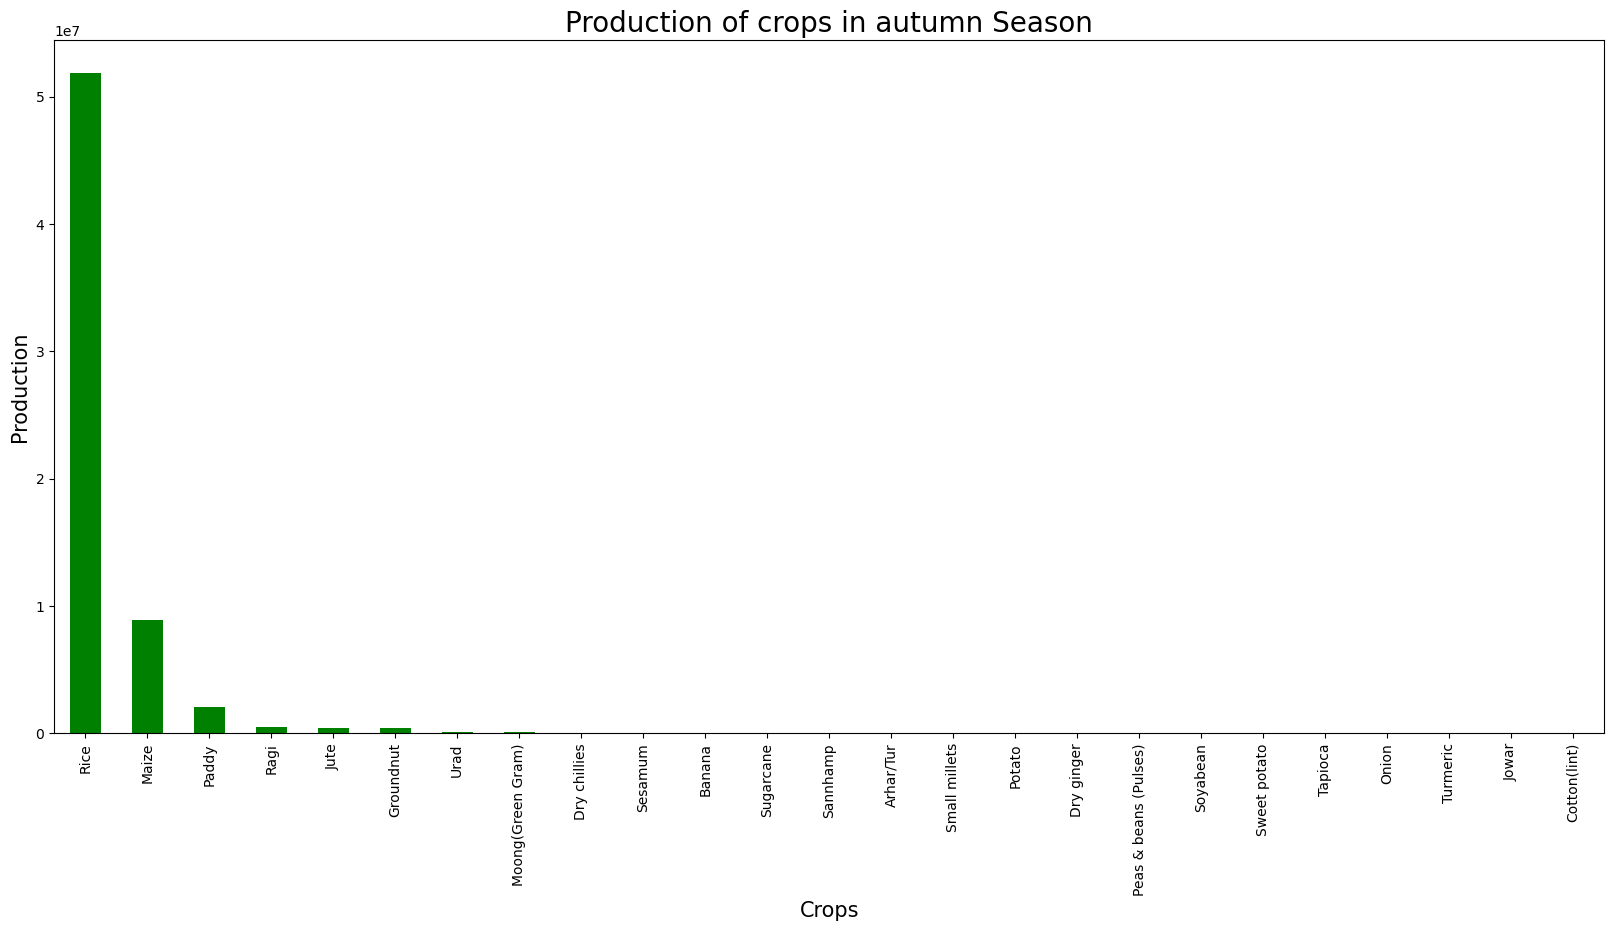

In [64]:
#Production of crops in autumn Season

plt.figure(figsize=(20,9))
autumn.groupby("Crop")["Production"].sum().sort_values(ascending = False).plot(kind = "bar" , color = "green")
plt.title("Production of crops in autumn Season",size=20)
plt.xlabel("Crops",size = 15)
plt.ylabel("Production",size =15)
plt.show()

In Autumn Season: 
1. Area Under Cultivation is 48 mha.
2. Highest producing state is Bihar.
3. Mostly Produced crop is Rice.

## Analysis on top states in crop production

### Kerala

In [65]:
kerala_df = df[df["State_Name"]=="Kerala"]
kerala_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
97987,Kerala,ALAPPUZHA,1997,Whole Year,Arecanut,2253.0,1518.00,Nuts
97988,Kerala,ALAPPUZHA,1997,Whole Year,Black pepper,2235.0,248.00,Spices
97989,Kerala,ALAPPUZHA,1997,Whole Year,Cashewnut,7205.0,2358.00,Nuts
97990,Kerala,ALAPPUZHA,1997,Whole Year,Coconut,77893.0,399000.00,None
97991,Kerala,ALAPPUZHA,1997,Whole Year,Tapioca,3911.0,74110.00,Vegetables
...,...,...,...,...,...,...,...,...
102242,Kerala,WAYANAD,2014,Whole Year,Sesamum,1.0,0.45,Oilseeds
102244,Kerala,WAYANAD,2014,Whole Year,Sweet potato,8.0,127.00,Vegetables
102245,Kerala,WAYANAD,2014,Whole Year,Tapioca,2327.0,99788.00,Vegetables
102246,Kerala,WAYANAD,2014,Whole Year,Turmeric,161.0,481.00,Spices


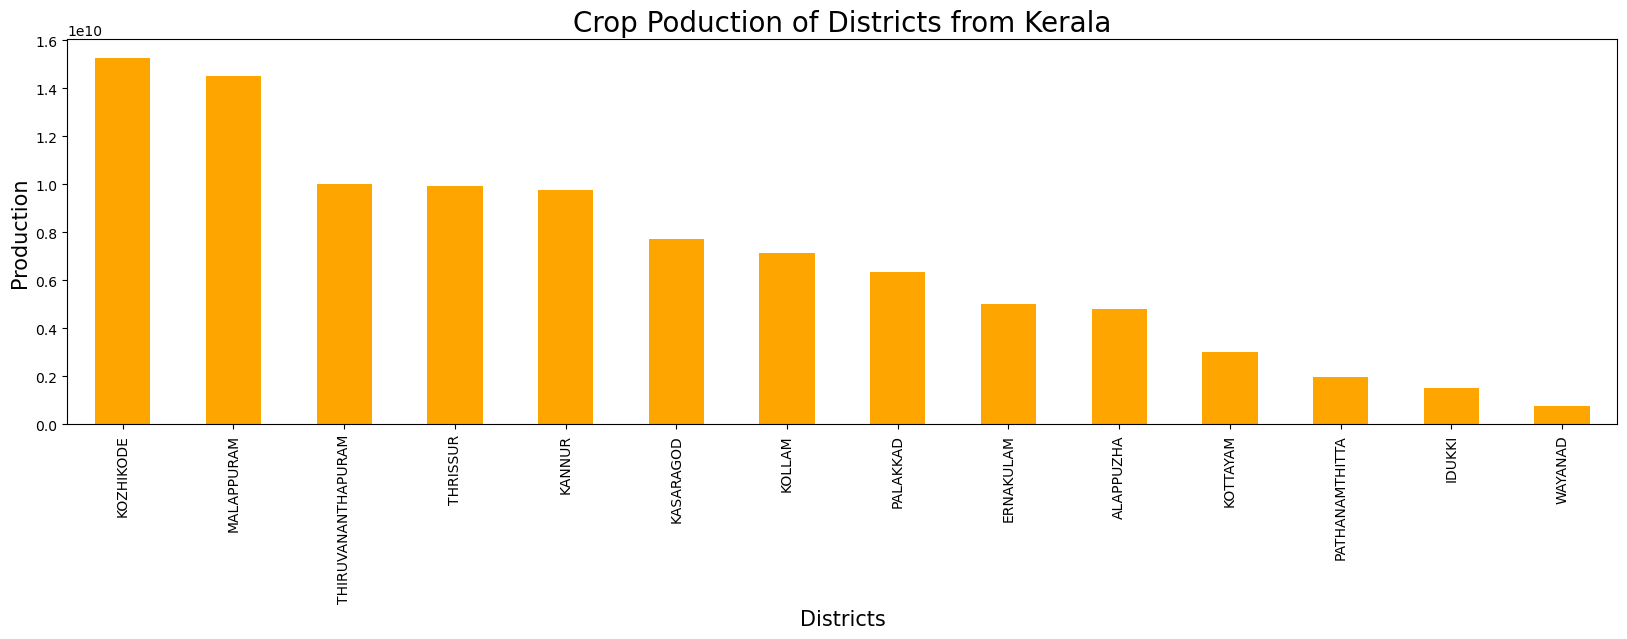

In [66]:
# plot crop production of districts from kerala

plt.figure(figsize=(20,5))
kerala_df.groupby("District_Name")["Production"].sum().sort_values(ascending = False).plot(kind = "bar",color="orange")
plt.title("Crop Poduction of Districts from Kerala",size = 20)
plt.xlabel("Districts",size =15)
plt.ylabel("Production",size = 15)
plt.show()

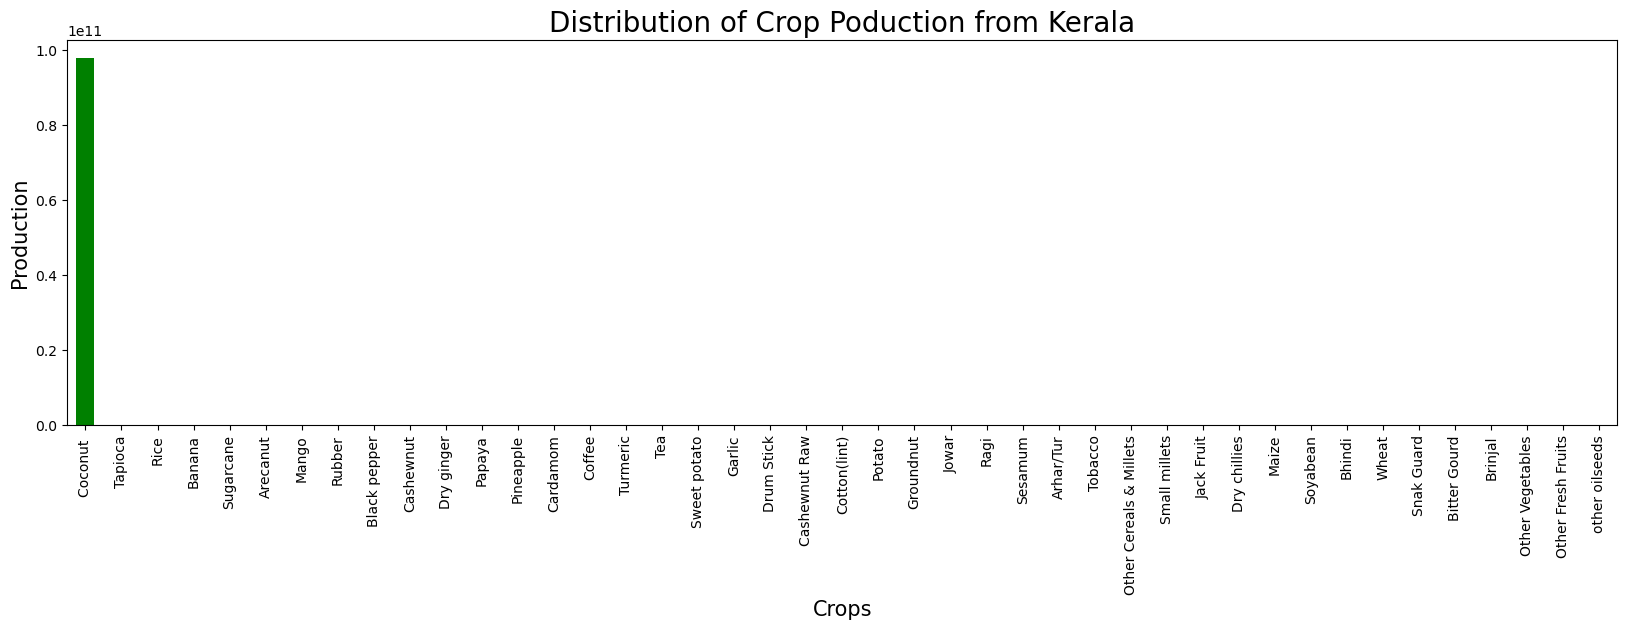

In [67]:
# plot ditribution of crop production from kerala

plt.figure(figsize=(20,5))
kerala_df.groupby("Crop")["Production"].sum().sort_values(ascending = False).plot(kind = "bar",color="green")
plt.title("Distribution of Crop Poduction from Kerala",size = 20)
plt.xlabel("Crops",size = 15)
plt.ylabel("Production",size = 15)
plt.show()

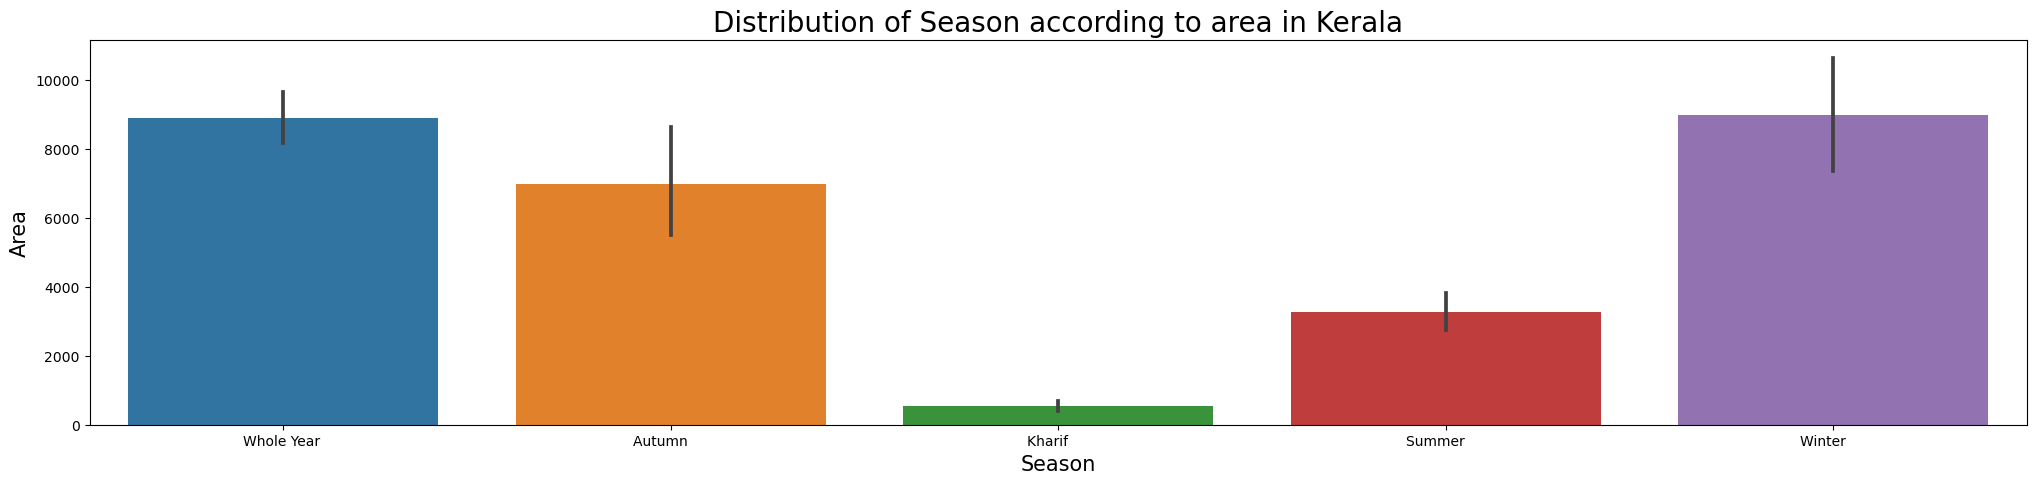

In [68]:
# Distribution of Season according to area in Kerala
plt.figure(figsize=(25,5))
sns.barplot(x = "Season" , y ="Area" , data = kerala_df)
plt.title("Distribution of Season according to area in Kerala",size = 20)
plt.xlabel("Season",size = 15)
plt.ylabel("Area" , size = 15)
plt.show()

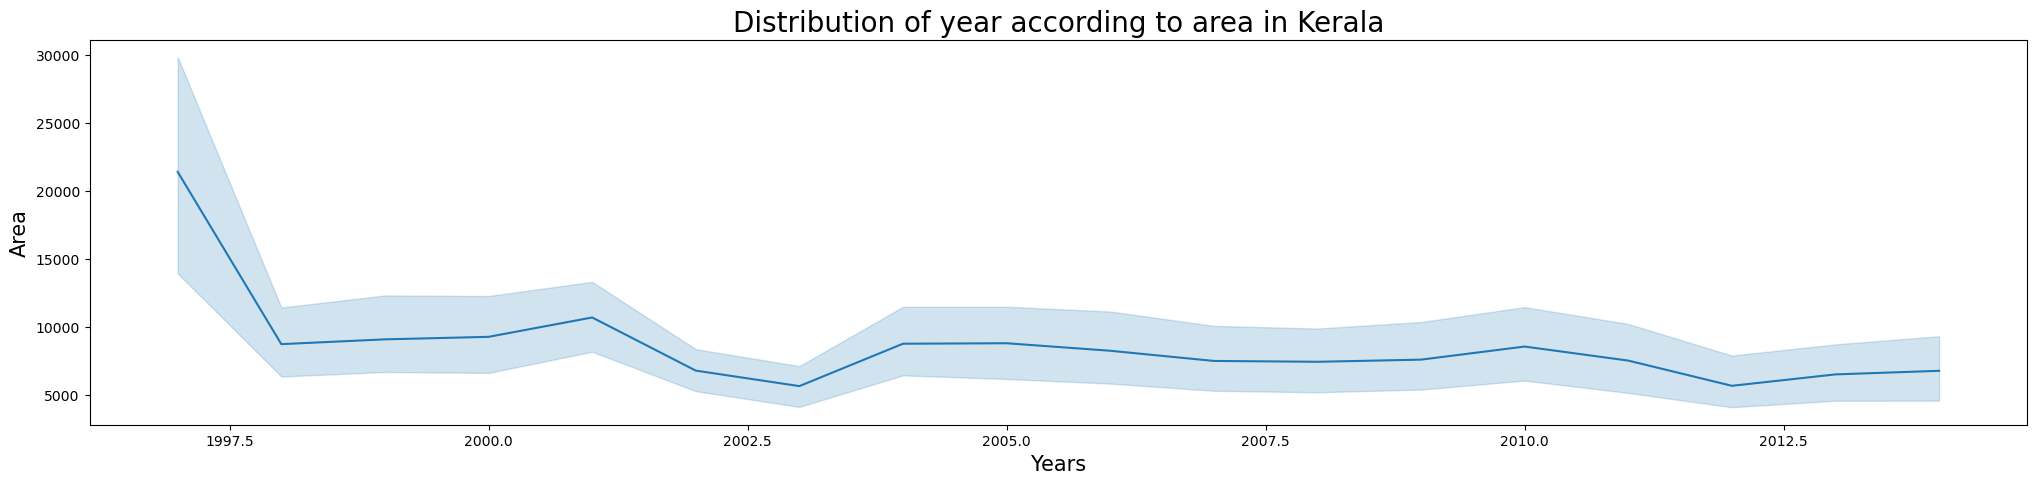

In [69]:
# Distribution of year according to area in Kerala
plt.figure(figsize=(25,5))
sns.lineplot(x = "Crop_Year" , y ="Area" , data = kerala_df)
plt.title("Distribution of year according to area in Kerala",size = 20)
plt.xlabel("Years",size = 15)
plt.ylabel("Area" , size = 15)
plt.show()

In Kerala:
   1. Kozhikode district leads in crop production.
   2. Coconut is a highly grown crop.
   3. Larger area under cultivation is seen in kharif season.
   4. After 1997 there is constant production till 2012.

### Maharashrtra

In [70]:
Maharashtra_df = df[df["State_Name"]=="Maharashtra"]
Maharashtra_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0,Cereal
125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,6300.0,Pulses
125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,152800.0,Cereal
125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,18600.0,Pulses
125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,1100.0,Cereal
...,...,...,...,...,...,...,...,...
137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,3300.0,Cereal
137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,200.0,Cereal
137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,26800.0,Cereal
137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,11500.0,Nuts


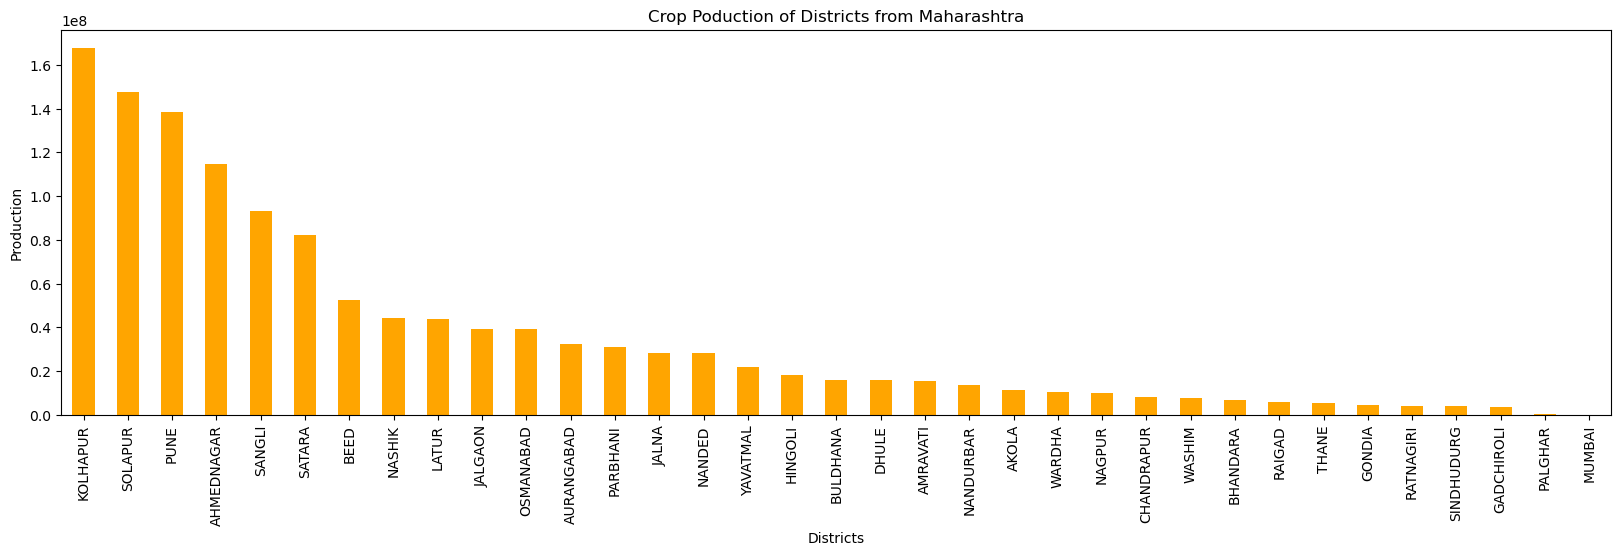

In [71]:
# plot crop production of districts from Maharashtra

plt.figure(figsize=(20,5))
Maharashtra_df.groupby("District_Name")["Production"].sum().sort_values(ascending = False).plot(kind = "bar",color="orange")
plt.title("Crop Poduction of Districts from Maharashtra")
plt.xlabel("Districts")
plt.ylabel("Production")
plt.show()

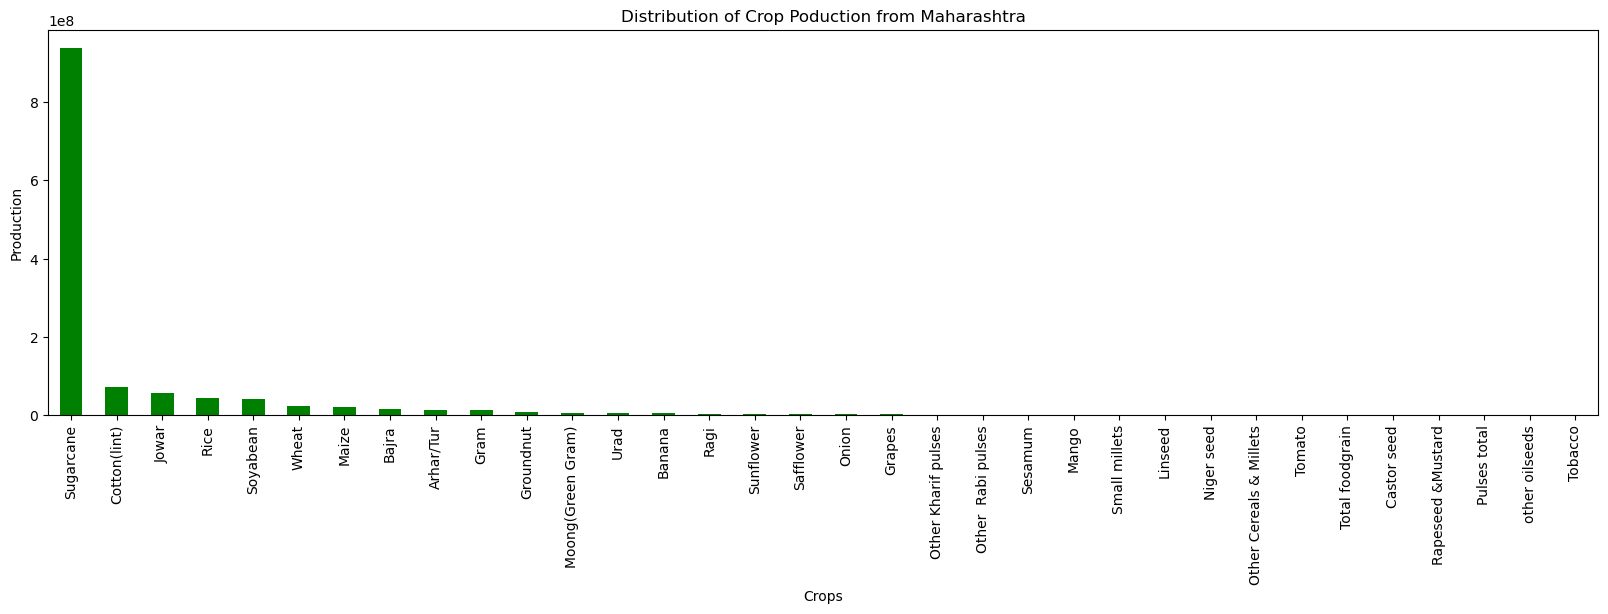

In [72]:
# plot ditribution of crop production from Maharashtra

plt.figure(figsize=(20,5))
Maharashtra_df.groupby("Crop")["Production"].sum().sort_values(ascending = False).plot(kind = "bar",color="green")
plt.title("Distribution of Crop Poduction from Maharashtra")
plt.xlabel("Crops")
plt.ylabel("Production")
plt.show()

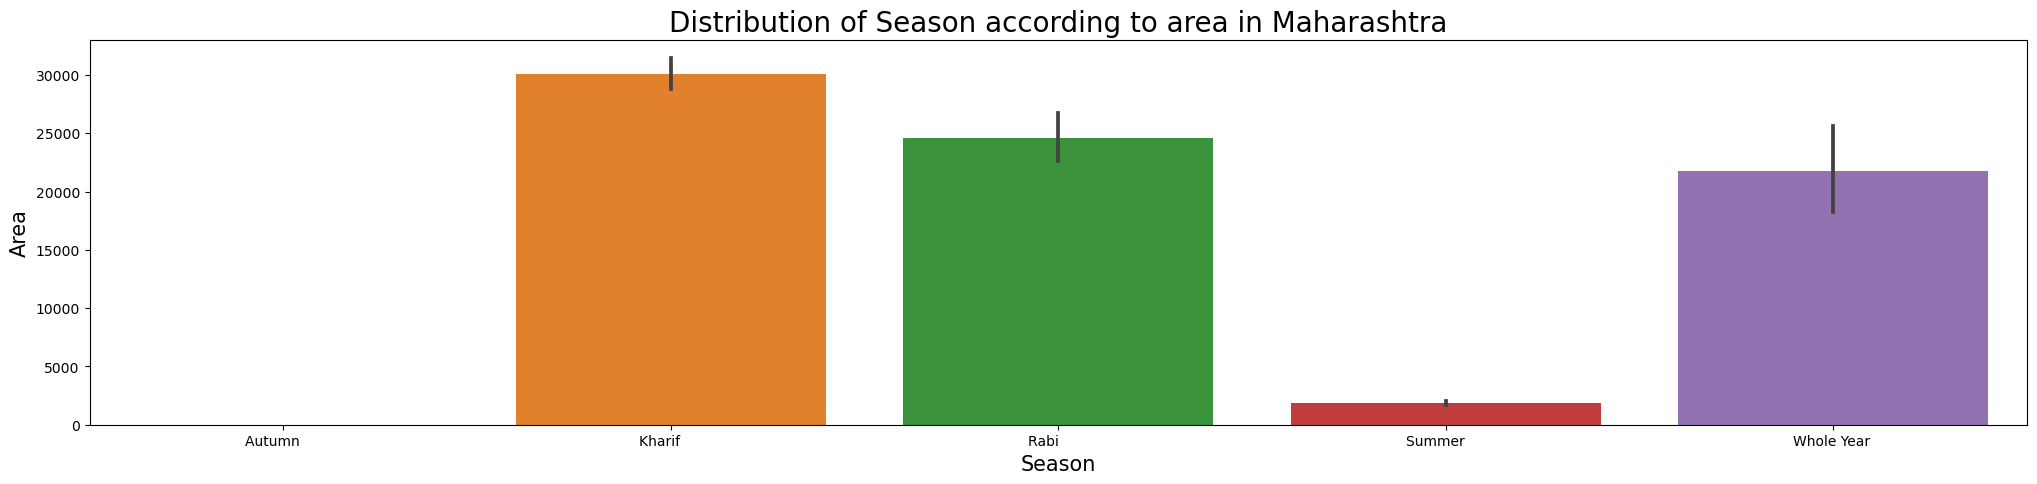

In [73]:
# Distribution of Season according to area in Maharashtra
plt.figure(figsize=(25,5))
sns.barplot(x = "Season" , y ="Area" , data = Maharashtra_df)
plt.title("Distribution of Season according to area in Maharashtra",size = 20)
plt.xlabel("Season",size = 15)
plt.ylabel("Area" , size = 15)
plt.show()

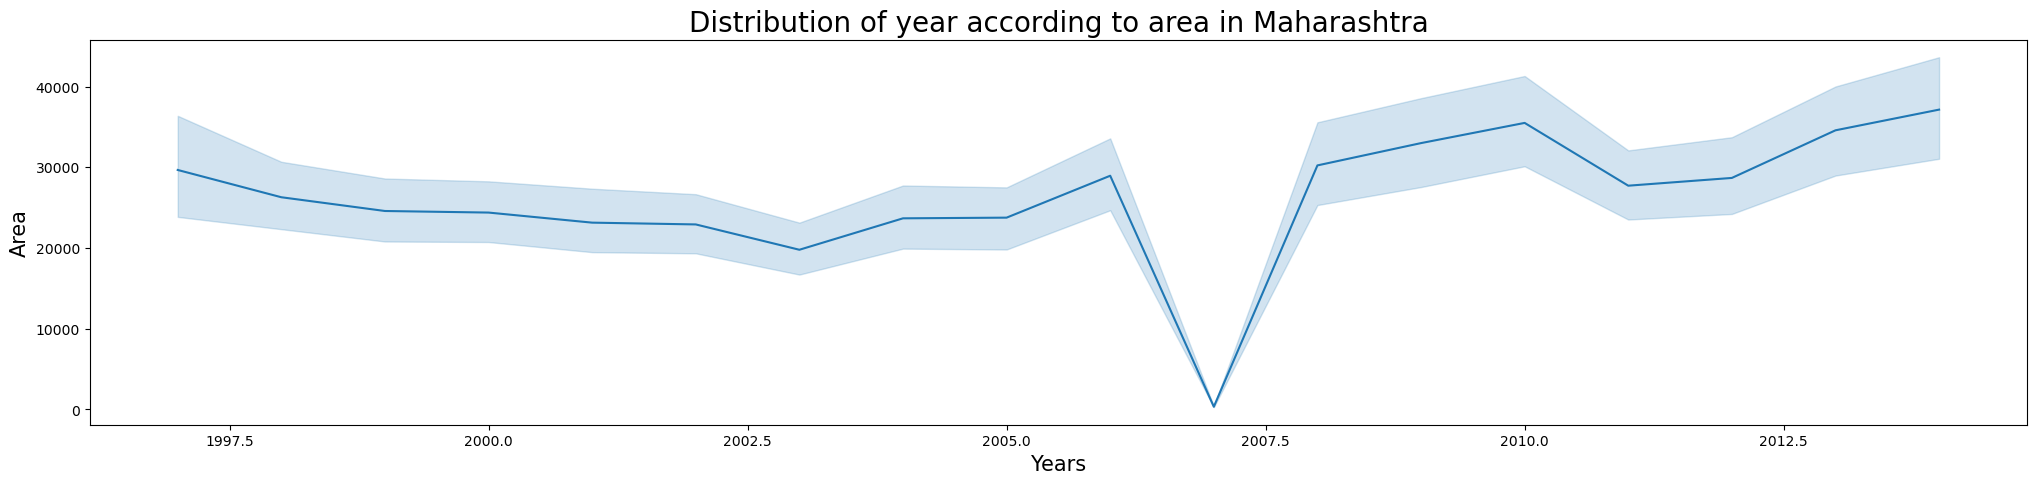

In [74]:
# Distribution of year according to area in Maharashtra
plt.figure(figsize=(25,5))
sns.lineplot(x = "Crop_Year" , y ="Area" , data = Maharashtra_df)
plt.title("Distribution of year according to area in Maharashtra",size = 20)
plt.xlabel("Years",size = 15)
plt.ylabel("Area" , size = 15)
plt.show()

In Maharashtra:
   1. Kolhapur district leads in crop production.
   2. Sugarcane is a highly grown crop.
   3. Larger area under cultivation is seen in kharif and rabi season.
   4. In year 2006 there was massive drop in area under cultivation.

### Punjab

In [75]:
pb_df = df[df["State_Name"]=="Punjab"]
pb_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,crop_cat
161267,Punjab,AMRITSAR,1997,Kharif,Arhar/Tur,1800.0,1400.0,Pulses
161268,Punjab,AMRITSAR,1997,Kharif,Bajra,1000.0,1000.0,Cereal
161269,Punjab,AMRITSAR,1997,Kharif,Maize,7000.0,14000.0,Cereal
161270,Punjab,AMRITSAR,1997,Kharif,Rice,292000.0,879000.0,Cereal
161271,Punjab,AMRITSAR,1997,Kharif,Sesamum,6000.0,1700.0,Oilseeds
...,...,...,...,...,...,...,...,...
164435,Punjab,TARN TARAN,2014,Kharif,Arhar/Tur,3000.0,1700.0,Pulses
164436,Punjab,TARN TARAN,2014,Kharif,Moong(Green Gram),12000.0,8000.0,None
164437,Punjab,TARN TARAN,2014,Kharif,Rice,176000.0,540000.0,Cereal
164438,Punjab,TARN TARAN,2014,Kharif,Sesamum,15000.0,6000.0,Oilseeds


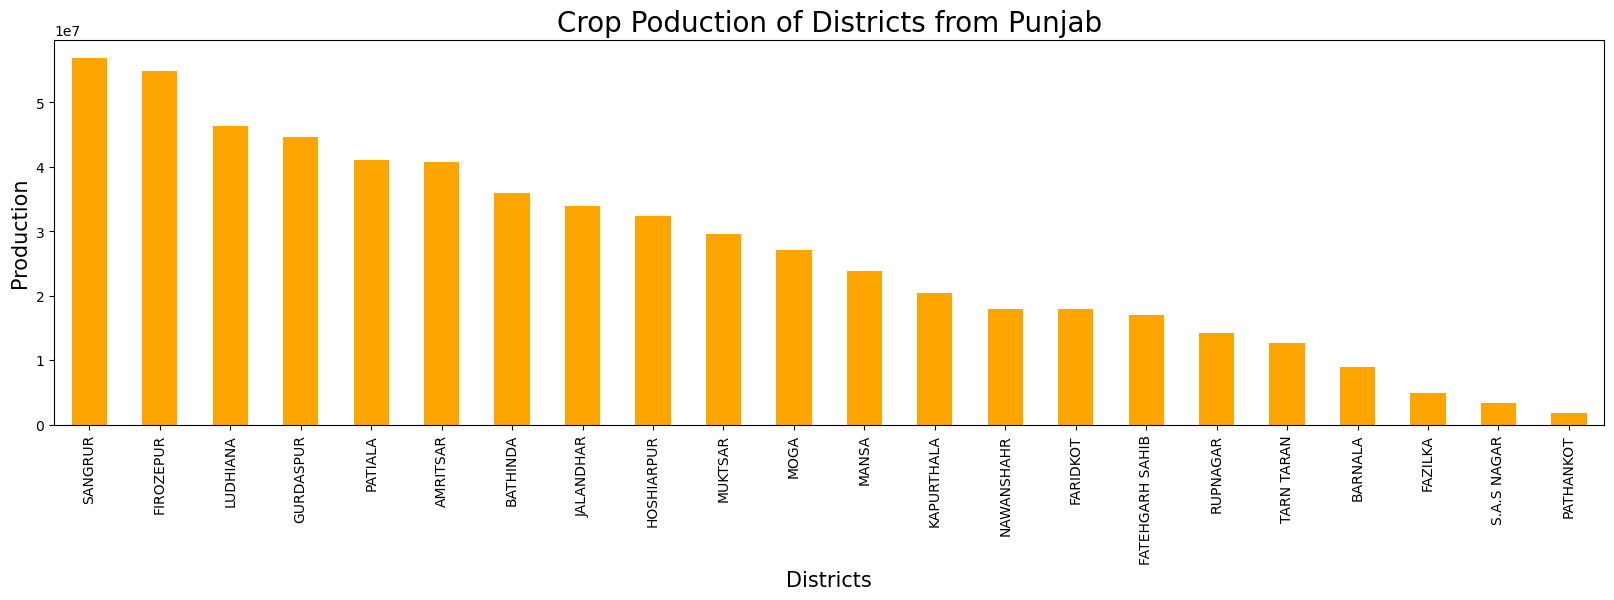

In [76]:
# plot crop production of districts from Punjab

plt.figure(figsize=(20,5))
pb_df.groupby("District_Name")["Production"].sum().sort_values(ascending = False).plot(kind = "bar",color="orange")
plt.title("Crop Poduction of Districts from Punjab" , size = 20)
plt.xlabel("Districts",size = 15)
plt.ylabel("Production",size = 15)
plt.show()

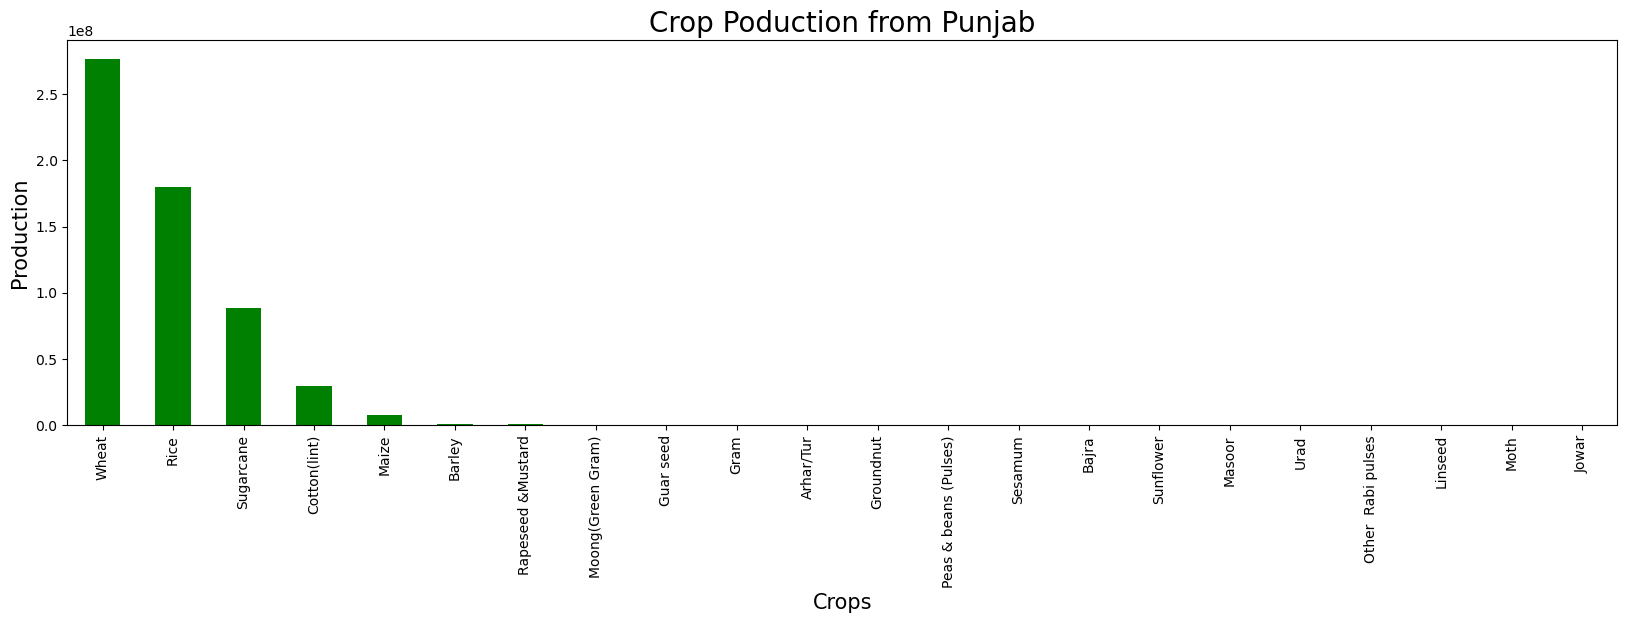

In [77]:
# plot crop production from Punjab

plt.figure(figsize=(20,5))
pb_df.groupby("Crop")["Production"].sum().sort_values(ascending = False).plot(kind = "bar",color="green")
plt.title("Crop Poduction from Punjab",size = 20)
plt.xlabel("Crops",size = 15)
plt.ylabel("Production", size = 15)
plt.show()

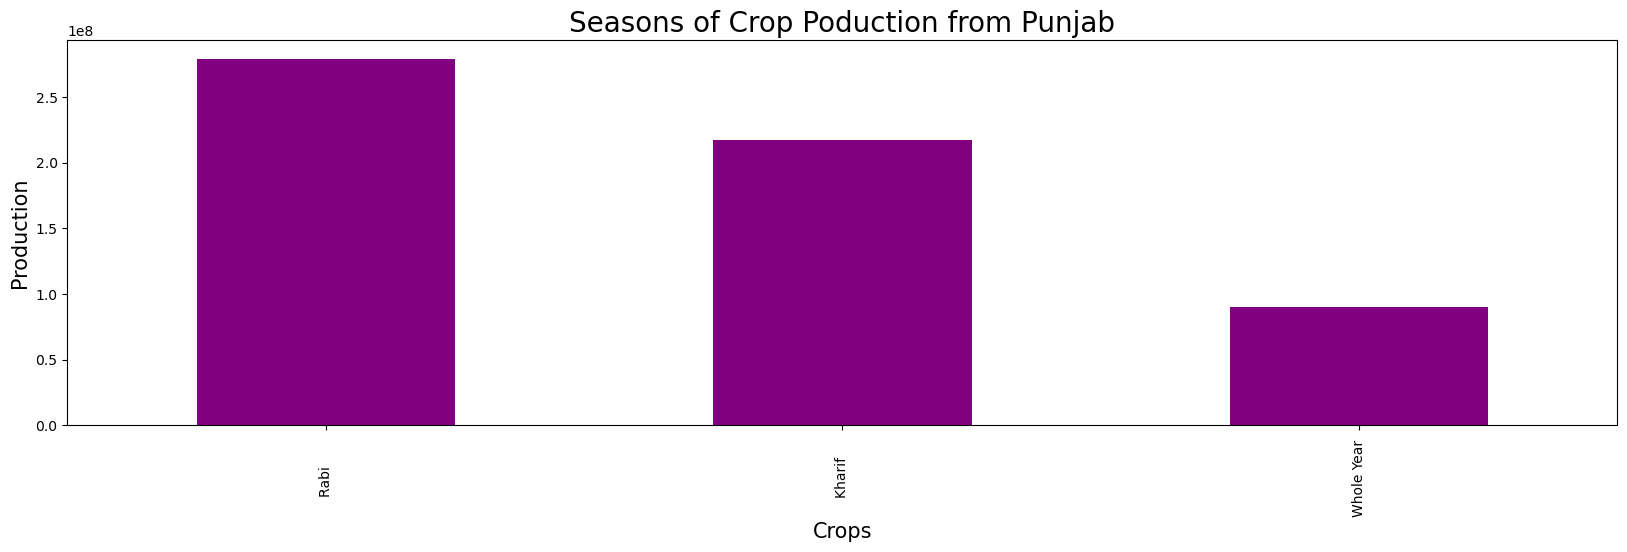

In [78]:
# plot seasons of crop production from Punjab

plt.figure(figsize=(20,5))
pb_df.groupby("Season")["Production"].sum().sort_values(ascending = False).plot(kind = "bar",color="purple")
plt.title("Seasons of Crop Poduction from Punjab",size = 20)
plt.xlabel("Crops",size = 15)
plt.ylabel("Production", size = 15)
plt.show()

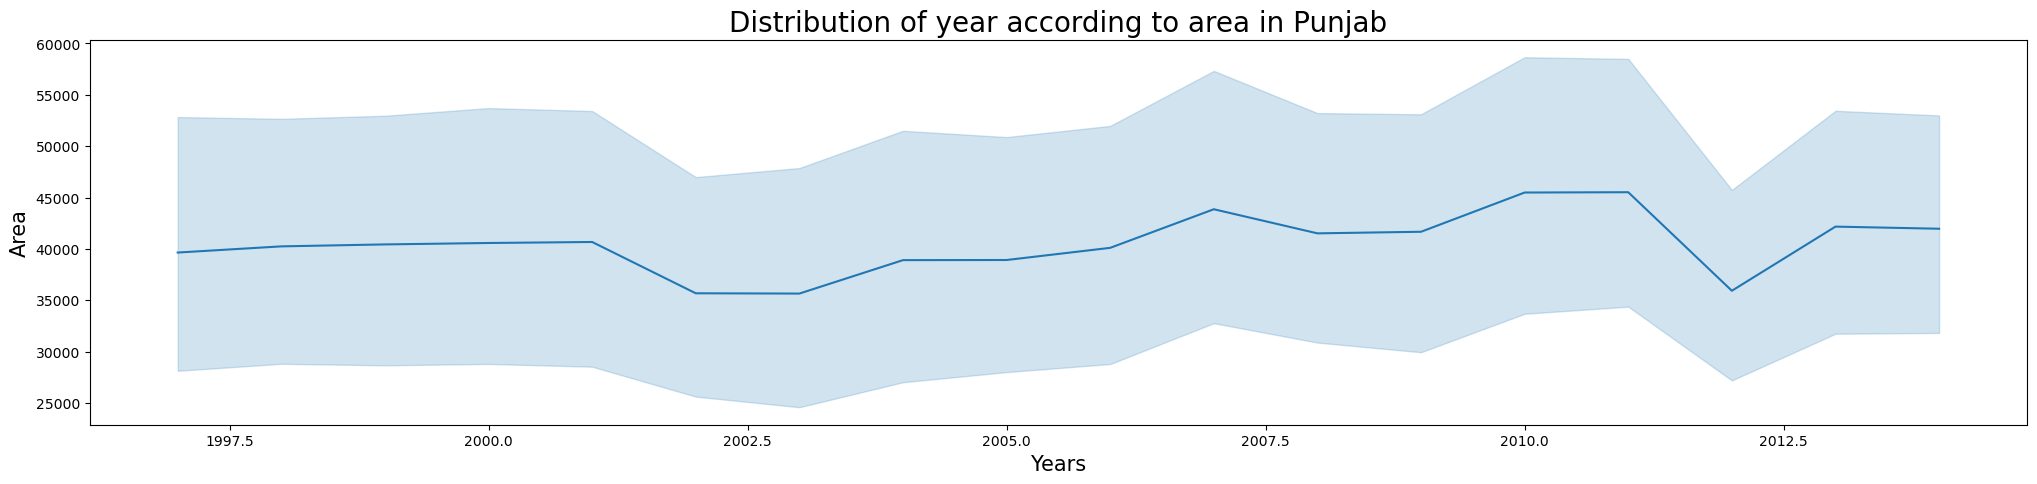

In [79]:
# Distribution of year according to area in Punjab
plt.figure(figsize=(25,5))
sns.lineplot(x = "Crop_Year" , y ="Area" , data = pb_df)
plt.title("Distribution of year according to area in Punjab",size = 20)
plt.xlabel("Years",size = 15)
plt.ylabel("Area" , size = 15)
plt.show()

In Punjab:
   1. Sangrur district leads in crop production.
   2. Wheat is a highly grown crop.
   3. Larger area under cultivation is seen in rabi season.
   4. Area under cultivation is constant.

## Conclusion

Analysis and Visualization Done On:
1. Crop Production in India in terms of States, Districts , Seasons , Years and Crops.
2. Crop Cultivation area with factors like States , Districts , Seasons , Years and Crops.
3. Top produced crops in India.
4. Top crop producing and cultivating States in India
5. Seasons with high production and area under cultivation.
